# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
import re
import lightgbm as lgb
import ast
import joblib
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import math
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

# Reading Data

In [3]:
df1=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\DataSet\info_base_games.csv")
df1.head()

,appid,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms
0,2574000,Femboy Burgers,NaN,True,True,True,"Casual, Indie",NaN,"Oct 9, 2023","['windows', 'mac', 'linux']"
1,2574120,PPA Pickleball Tour 2025,NaN,True,True,True,"Indie, Simulation, Sports",18,"Jul 16, 2024","['windows', 'mac', 'linux']"
2,2573200,Squeaky Squad,NaN,True,True,True,"Action, Adventure, Indie",27,"Mar 29, 2024","['windows', 'mac', 'linux']"
3,2573440,Paradox Metal,NaN,True,True,True,"Action, Early Access",NaN,Coming soon,"['windows', 'mac', 'linux']"
4,2569520,Naturpark Lillebælt VR,NaN,True,True,True,"Action, Adventure",NaN,"Sep 18, 2023","['windows', 'mac', 'linux']"


In [4]:
df1.shape

(99167, 10)

In [5]:
data_info(df1)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,object,"[1811260, 2574000, 1024400, 1023570, 1023560, ...",99166,0,0.000000,0
1,name,object,"[Echoes, Delirium, Dark Light, Creator-initial...",95004,18,0.018151,0
2,metacritic,object,"[80, 76, 75, 68, 73, 81, 79.0, 81.0, 80.0, 77]",170,96148,96.955640,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Action, Adventure, Indie, Casual, Indie, Acti...",2699,4778,4.818135,0
7,achievements_total,object,"[10, 12, 6, 20, 15, 10.0, 5, 8, 11, 16]",695,61052,61.564835,0
8,release_date,object,"[Coming soon, To be announced, 2025, Q1 2025, ...",4788,306,0.308570,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,0


In [6]:
df2=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\DataSet\demos.csv")
df2.head()

,Unnamed: 0,full_game_appid,demo_appid,name
0,0,2214650,2573370,Rolando Deluxe Demo
1,1,1439980,2573460,Outrunner: Neon Nights Demo
2,2,2412240,2572840,Bubble Ghost Remake Demo
3,3,2448830,2572240,Time Handlers Demo
4,4,2379590,2570800,Hope's Final Defense Demo


In [7]:
df2.shape

(15449, 4)

In [8]:
data_info(df2)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Unnamed: 0,int64,"[0, 10264, 10296, 10297, 10298, 10299, 10300, ...",15449,0,0.000000,0
1,full_game_appid,object,"[2214650, 1646810, 1831020, 1832380, 1146420, ...",15449,0,0.000000,0
2,demo_appid,object,"[2573370, 1855960, 1846470, 1845950, 1845990, ...",15449,0,0.000000,0
3,name,object,"[Exodus Demo, #NAME?, Automatica Demo, Dungeon...",15425,1,0.006473,0


In [9]:
df3=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\DataSet\dlcs.csv")
df3.head()

,base_appid,dlc_appid,name
0,1786750,2568660,家出王女 - 全年齢版ストーリー&グラフィック追加 DLC
1,1981700,2563730,Jacob's Quest - Voyage
2,2009450,2552980,Invector: Rhythm Galaxy - Latin Power Song Pack
3,1133420,2550750,Hero or Villain: Genesis — Supercharged!
4,2533950,2551000,Hot And Lovely ：Uniform - adult patch


In [10]:
df3.shape

(5445, 3)

In [11]:
data_info(df3)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,base_appid,object,"[1786750, 638850, 883390, 880550, 771500, 8131...",5445,0,0.0,0
1,dlc_appid,object,"[2568660, 890020, 888110, 887980, 888590, 8890...",5445,0,0.0,0
2,name,object,"[Dungeon Full Dive - True Supporter Dice, Doll...",5443,0,0.0,0


In [12]:
df4=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Regression\DataSet\gamalytic_steam_games.csv")
df4.head()

,steamId,price,copiesSold,publisherClass,reviewScore,aiContent
0,730,0.0,302158048,AAA,87,NaN
1,570,0.0,212896574,AAA,82,NaN
2,578080,0.0,161971233,AAA,59,NaN
3,440,0.0,99060457,AAA,90,NaN
4,1172470,0.0,67554185,AAA,67,NaN


In [13]:
df4.shape

(93338, 6)

In [14]:
data_info(df4)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steamId,int64,"[730, 848890, 3461160, 770850, 2304650, 109873...",93338,0,0.0,0
1,price,float64,"[0.0, 4.99, 9.99, 0.99, 1.99, 2.99, 3.99, 14.9...",350,0,0.0,0
2,copiesSold,int64,"[1, 15, 30, 36, 45, 75, 72, 18, 60, 90]",22474,0,0.0,0
3,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,0
4,reviewScore,int64,"[100, 0, 50, 67, 75, 83, 80, 88, 86, 89]",99,0,0.0,0
5,aiContent,float64,[],0,93338,100.0,0


# Convert Appid Data Type in all Data Frames

In [15]:
df1["appid"] = pd.to_numeric(df1['appid'], errors='coerce').astype('Int64')
df2["appid"] = pd.to_numeric(df2['full_game_appid'], errors='coerce').astype('Int64')
df3["appid"] = pd.to_numeric(df3['base_appid'], errors='coerce').astype('Int64')
df4["appid"] = pd.to_numeric(df4['steamId'], errors='coerce').astype('Int64')

# Merge All Data Frames

In [16]:
merged = pd.merge(df1,   df4, on='appid', how='inner')
merged = pd.merge(merged, df2,   on='appid', how='left')
df = pd.merge(merged, df3,  on='appid', how='left')

In [17]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,Int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,0
1,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,0
2,metacritic,object,"[80, 76, 73, 68, 75, 81, 79.0, 81.0, 80.0, 77]",169,66495,95.775480,0
3,steam_achievements,bool,"[True, False]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,0
7,achievements_total,object,"[10, 12, 6, 20, 15, 10.0, 8, 5, 11, 16]",691,32133,46.282480,0
8,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,0


# Dropping Columns With High Null%

In [18]:
dropped_list=["metacritic","achievements_total","aiContent","Unnamed: 0","full_game_appid","demo_appid","name_y",
              "base_appid","dlc_appid","name"]

df.drop(columns=dropped_list,inplace=True)

In [19]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,Int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,2
1,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,2
2,steam_achievements,bool,"[True, False]",2,0,0.000000,2
3,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2
4,workshop_support,bool,"[False, True]",2,0,0.000000,2
5,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,2
6,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,2
7,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,2
8,steamId,int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,2
9,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.000000,2


# Measure Correlation with id's

In [20]:
list1=["appid","steamId","copiesSold"]
cor=df[list1].corr()
cor

,appid,steamId,copiesSold
appid,1.000000,1.000000,-0.053396
steamId,1.000000,1.000000,-0.053396
copiesSold,-0.053396,-0.053396,1.000000


# Dropping columns with high unique values and irrelevant to target

In [21]:
df.drop(["steamId","appid"],axis=1,inplace=True)

In [22]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,2
1,steam_achievements,bool,"[True, False]",2,0,0.000000,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2
3,workshop_support,bool,"[False, True]",2,0,0.000000,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,2
5,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,2
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,2
7,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.000000,2
8,copiesSold,int64,"[1, 15, 30, 36, 45, 18, 75, 72, 60, 90]",17774,0,0.000000,2
9,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.000000,2


# Preprocess on all merged Data (Handle Nulls, Duplicates , Outliers)

Missing Values are in Genres & release_date column

In [23]:
df["genres"]=df["genres"].fillna(method='ffill').fillna(method='bfill')
df.dropna(subset=["release_date"], inplace=True)

In [24]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Delirium, Echoes, Arena, Dodge, Zombie Hunter...",67529,0,0.0,2
1,steam_achievements,bool,"[True, False]",2,0,0.0,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.0,2
3,workshop_support,bool,"[False, True]",2,0,0.0,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,2
5,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,0,0.0,2
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,2
7,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,2
8,copiesSold,int64,"[1, 15, 30, 36, 45, 18, 75, 72, 60, 90]",17772,0,0.0,2
9,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,2


In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Converting release_date to age by years (>=2026 → 0, 2025 → 1, 2024 → 2, etc.)

In [26]:
year_anchor = pd.Timestamp('2026-01-01')

df['age_years'] = df["release_date"].str.replace(r".*-25$", "Jan 1, 2025", regex=True)
df['age_years'] = df['age_years'].apply(lambda x: "Jan 1, 2025" if x in ["Q1 2025", "Q2 2025", "Q3 2025", "Q4 2025", "2025"] else x)
df['age_years'] = pd.to_datetime(df['age_years'], errors='coerce')
df['age_years'] = df['age_years'].fillna(year_anchor)
df['age_years'] = (year_anchor.year - df['age_years'].dt.year)
df.drop(columns=['release_date'], inplace=True)

In [27]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Delirium, Echoes, Arena, Dodge, Zombie Hunter...",67529,0,0.0,2
1,steam_achievements,bool,"[True, False]",2,0,0.0,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.0,2
3,workshop_support,bool,"[False, True]",2,0,0.0,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,2
5,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,2
6,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,2
7,copiesSold,int64,"[1, 15, 30, 36, 45, 18, 75, 72, 60, 90]",17772,0,0.0,2
8,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,2
9,reviewScore,int64,"[100, 0, 50, 67, 75, 80, 83, 88, 86, 89]",99,0,0.0,2


# Handling Outliers

In [28]:
# def handle_Numerical_outliers(data,column):
#     """
#     This function handles outliers.
#     """
#     i = 1
#     plt.figure(figsize=(15, 8))
#     for col in column:
#         plt.subplot(2, 2 , i)
#         sns.boxplot(y=data[col], color='skyblue')
#         plt.title(col)
#         i += 1
#     plt.tight_layout()
#     plt.suptitle('Boxplots Before Handling Outliers', fontsize=18, y=1.02)
#     plt.show()

#     i=1

#     for col in column:
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.9 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#     plt.figure(figsize=(15, 8))
#     for col in column:
#         plt.subplot(2, 2 , i)
#         sns.boxplot(y=data[col], color='skyblue')
#         plt.title(col)
#         i += 1
#     plt.tight_layout()
#     plt.suptitle('Boxplots After Handling Outliers', fontsize=18, y=1.02)
#     plt.show()
    
#     return data

# li=["price","reviewScore"]

# df=handle_Numerical_outliers(df,li)

# Feature Engineering

## 🎮 1. GameRating

We engineered the `GameRating` feature by combining multiple signals that correlate with game sales. Each sub-feature is designed to reflect real-world factors affecting game performance.

### 🧩 Components:

#### ✅ `extras_mean`
- Mean of game-related extras: **Achievements**, **Trading Cards**, and **Workshop Support**.
- A small constant (+1) is added to avoid zero values.
- 🧠 **Intuition**: More extras typically lead to higher player engagement → **More Sales** *(Direct Relation)*.

#### ✅ `reviewScore`
- Represents the overall review score of the game.
- Also incremented by +1 to prevent zero values.
- 🧠 **Intuition**: Better reviews attract more players → **More Sales** *(Direct Relation)*.

#### ✅ `publisher_encode`
- Numerical encoding of publisher type:
  - AAA >>> AA >> Indie > Hobbyist
- 🧠 **Intuition**: Well-known publishers usually have more marketing power → **More Sales**.

#### ✅ `age_years`
- Release date converted to age by years (2026 and above = 0, 2025 = 1, 2024 = 2, etc.).
- +1 to avoid multiplication by zero.
- 🧠 **Intuition**: Older games have had more time to accumulate sales → **Inverse Relation**  
  *(i.e., earlier release = more time for copies sold)*.

In [29]:
publisher_encode = df["publisherClass"].map({ "Hobbyist": 0.01, "Indie": 0.5, "AA": 3, "AAA": 10 })
extras_mean=(df["steam_achievements"]+df["steam_trading_cards"]+df["workshop_support"])/3

df["1-GameRating"]=((extras_mean+1)*(df["reviewScore"]+1)*publisher_encode)*((df['age_years']) + 1)

# Measure Correlation with Target

In [30]:
list1=["1-GameRating","copiesSold"]
correlation=df[list1].corr()
correlation

,1-GameRating,copiesSold
1-GameRating,1.000000,0.209514
copiesSold,0.209514,1.000000


## 📊 2. GameRatingWithGenres

- Included the `genres` column in our `GameRating` feature.  
- Slightly worse correlation from **0.209** → **0.202**.

### 🧩 Steps:
1. Get total `copiesSold` for each unique genre across the dataframe.
2. Replace every row in `genres` with the **mean** of `copiesSold` of its genres.
3. Divide by **10 million** to make the values smaller.
4. Multiply `GameRating` by the new `genres` value to create the new feature.

In [31]:
df['genresTemp'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
from collections import Counter

genre_counter = Counter([genre for sublist in df['genresTemp'] for genre in sublist])
common_genres = {genre for genre, count in genre_counter.items()}

dict1={}
for i in common_genres:
    dict1[i]=0
for idx,genre in df["genresTemp"].items():
    for j in genre:
        dict1[j] += df.loc[idx, "copiesSold"]

genre_means = []

for idx, genre_list in df["genresTemp"].items():
    mean1 = 0
    for genre in genre_list:
        mean1 += dict1[genre]
    if mean1 == 0:
        mean1 = 1
    else:
        mean1 /= len(genre_list)
    genre_means.append(mean1)

df.drop("genresTemp",inplace=True,axis=1)
genre_means = [x + 1 for x in genre_means]
df["2-GameRatingWithGenres"] = (genre_means * df["1-GameRating"])/1e7

# Measure Correlation with Target

In [32]:
li=["2-GameRatingWithGenres","copiesSold"]
cor=df[li].corr()
cor

,2-GameRatingWithGenres,copiesSold
2-GameRatingWithGenres,1.000000,0.202118
copiesSold,0.202118,1.000000


## 💰 3. RatingOverPrice

- Divided `GameRatingWithGenres` feature by `price` feature.
- +1 to avoid division by zero.
- Improves correlation from **0.202** → **0.389**.
- 🧠 **Intuition**: Lower price (generally) means more sales → Inverse Relation

In [33]:
df["3-RatingOverPrice"]=df["2-GameRatingWithGenres"]/(df["price"]+1)

# Measure Correlation with Target

In [34]:
li=["3-RatingOverPrice","copiesSold"]
cor=df[li].corr()
cor

,3-RatingOverPrice,copiesSold
3-RatingOverPrice,1.000000,0.389837
copiesSold,0.389837,1.000000


## 💻 4. GameRatingWithPlatforms

- Included the `supported_platforms` column in our `RatingOverPrice` feature.
- Improves correlation from **0.389** → **0.584**.

### 🧩 Steps:
1. Set each platform to a specific value (trial & errored our choices).
2. Replaced each value in `supported_platforms` with sum of its platforms.
3. Multiplied `RatingOverPrice` by the new column.

In [35]:
d=df["copiesSold"].groupby(df["supported_platforms"]).mean()
d.sort_values(ascending=False)

supported_platforms
['windows', 'linux']           316682.495663
['windows', 'mac']             122515.366342
['windows', 'mac', 'linux']    120414.702320
['windows']                     62426.017278
['mac', 'linux']                 3827.000000
['mac']                           497.500000
['linux']                         360.000000
Name: copiesSold, dtype: float64

In [36]:
li=[]
dict2={"windows":10,"mac":0.01,"linux":30}
for idx,platform in df["supported_platforms"].items():
    sum1=1
    platform_list = ast.literal_eval(platform)
    for j in platform_list:
        sum1+=dict2[j]
    li.append(sum1)

df["4-GameRatingWithPlatforms"]=df["3-RatingOverPrice"]*li

# Measure Correlation with Target

In [37]:
li=["4-GameRatingWithPlatforms","copiesSold"]
cor=df[li].corr()
cor

,4-GameRatingWithPlatforms,copiesSold
4-GameRatingWithPlatforms,1.000000,0.580893
copiesSold,0.580893,1.000000


## 💿 5. NameAsCopiesSold

- Encoded `name_x` column similar to `genres`.

### 🧩 Steps:
1. Preprocessed the names using nlp techniques (Tokenization, StopWords Removal, Lemmatization)
2. Get total copiesSold for each unique token.
3. Replaced every row with mean of its tokens.
4. Divided by 10,000 to make the values smaller.

In [38]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    words = text.split()
    cleaned_words = []
    for word in words:
        word = word.strip().lower()
        word = re.sub(r'[^a-zA-Z]', '', word)
        if word and word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned_words.append(lemma)
    return cleaned_words

df['name'] = df['name_x'].apply(clean_and_lemmatize)

dict12={}
for idx,name in df["name"].items():
    for j in name:
        if j not in dict12:
            dict12[j]=0
        dict12[j] += df.loc[idx, "copiesSold"]

name_means = []

for idx, names_list in df["name"].items():
    mean1 = 0
    if len(names_list) != 0:
        for name in names_list:
            mean1 += dict12[name]
        mean1 /= len(names_list)
    name_means.append(mean1)

df.drop(["name_x","name"],inplace=True,axis=1)
df["5-NameAsCopiesSold"] = name_means
df["5-NameAsCopiesSold"] +=1
df["5-NameAsCopiesSold"] /= 1e4

## 💯 6. GameRatingWithNames 

- Multiplied `GameRatingWithPlatforms` feature by the `NameAsCopiesSold` feature.
- Improves correlation from **0.584** → **0.799**.

In [39]:
df["6-GameRatingWithNames"] = df["5-NameAsCopiesSold"] * df["4-GameRatingWithPlatforms"]

# Measure Correlation with Target

In [40]:
li=["6-GameRatingWithNames","copiesSold"]
cor=df[li].corr()
cor

,6-GameRatingWithNames,copiesSold
6-GameRatingWithNames,1.000000,0.801053
copiesSold,0.801053,1.000000


# Measure All New Columns Correlation with Target

In [41]:
li=["1-GameRating","2-GameRatingWithGenres","3-RatingOverPrice","4-GameRatingWithPlatforms","5-NameAsCopiesSold","6-GameRatingWithNames","copiesSold"]
cor=df[li].corr()
cor

,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,copiesSold
1-GameRating,1.000000,0.909428,0.476529,0.398519,0.131325,0.140331,0.209514
2-GameRatingWithGenres,0.909428,1.000000,0.501508,0.429955,0.120347,0.155389,0.202118
3-RatingOverPrice,0.476529,0.501508,1.000000,0.815760,0.093774,0.404874,0.389837
4-GameRatingWithPlatforms,0.398519,0.429955,0.815760,1.000000,0.116052,0.695864,0.580893
5-NameAsCopiesSold,0.131325,0.120347,0.093774,0.116052,1.000000,0.146174,0.159047
6-GameRatingWithNames,0.140331,0.155389,0.404874,0.695864,0.146174,1.000000,0.801053
copiesSold,0.209514,0.202118,0.389837,0.580893,0.159047,0.801053,1.000000


# Explore The Data again

In [42]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_achievements,bool,"[True, False]",2,0,0.0,134
1,steam_trading_cards,bool,"[False, True]",2,0,0.0,134
2,workshop_support,bool,"[False, True]",2,0,0.0,134
3,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,134
4,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,134
5,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,134
6,copiesSold,int64,"[1, 15, 30, 36, 45, 18, 75, 72, 60, 90]",17772,0,0.0,134
7,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,134
8,reviewScore,int64,"[100, 0, 50, 67, 75, 80, 83, 88, 86, 89]",99,0,0.0,134
9,age_years,int32,"[2, 5, 3, 8, 4, 7, 6, 9, 1, 12]",30,0,0.0,134


# Dropping Duplicates

In [43]:
df.drop_duplicates(inplace=True)

# Saving Null Imputers

In [44]:
Null_Dict={"price":df["price"].mode()[0], "reviewScore":df["reviewScore"].mean().astype(int),
           "age_years":df["age_years"].mode()[0], "genres":"",
           "name_x":"",
           "supported_platforms":"[]", "steam_achievements":True,"steam_trading_cards":False, 
           "workshop_support":False, "publisherClass" : "Hobbyist"}

# Handling Unknown new values

In [45]:
Unknown_Values={"publisherClass":"Hobbyist"}

# Splitting The Data

In [46]:
X=df.drop("copiesSold",axis=1)
y=df["copiesSold"]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Transformed y to fix skewness

In [48]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

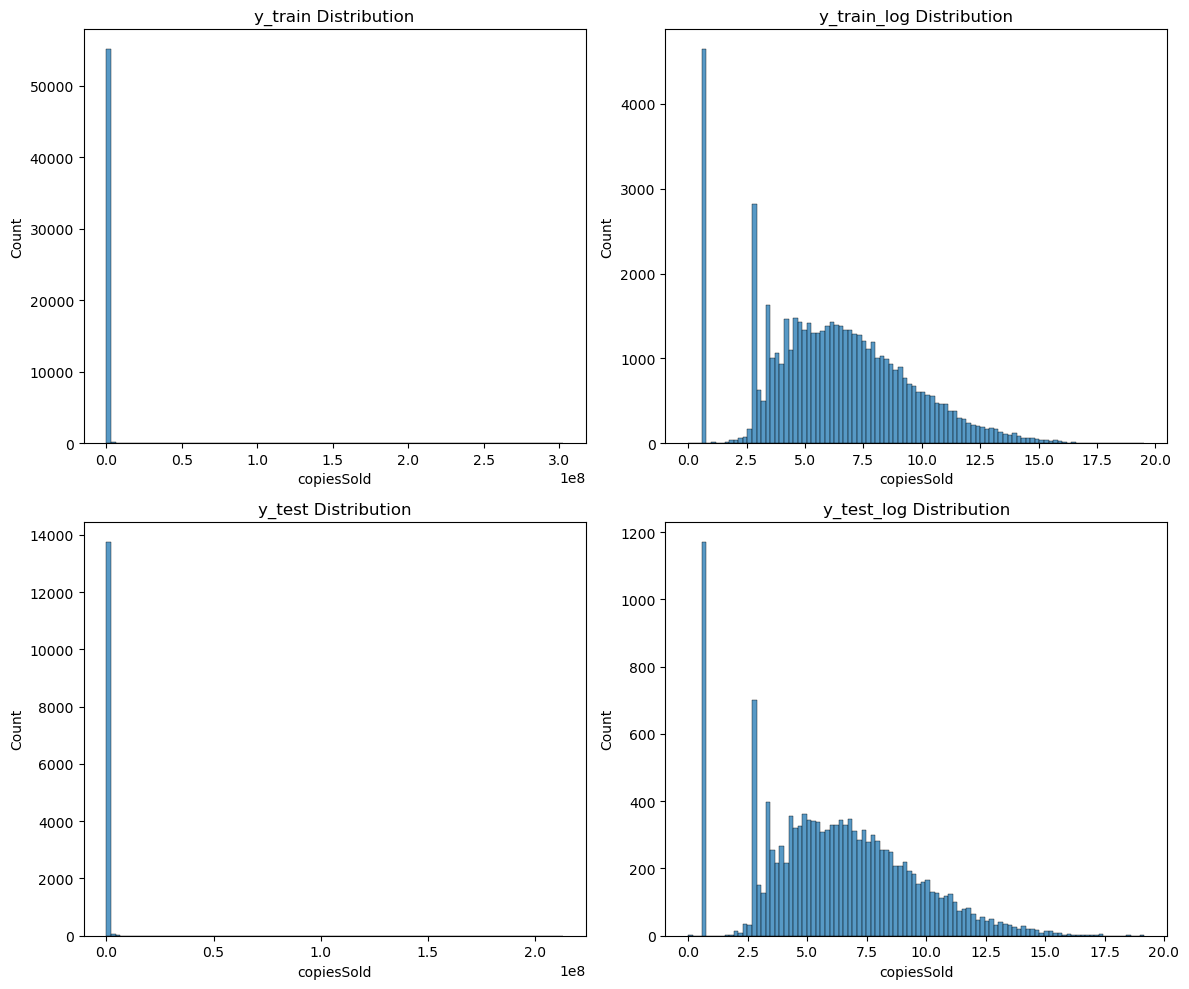

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(y_train , bins=100, ax=axes[0, 0])
axes[0, 0].set_title('y_train Distribution')

sns.histplot(y_train_log , bins=100, ax=axes[0, 1])
axes[0, 1].set_title('y_train_log Distribution')

sns.histplot(y_test , bins=100, ax=axes[1, 0])
axes[1, 0].set_title('y_test Distribution')

sns.histplot(y_test_log, bins=100, ax=axes[1, 1])
axes[1, 1].set_title('y_test_log Distribution')

plt.tight_layout()
plt.show()

# Scaling 

- `reviewScore` using MinMaxScaler (0<= reviewScore <=100, fixed range).
- rest using RobustScaler (less sensitive than StandardScaler to outliers).

In [50]:
numerical_columns=["price","1-GameRating","2-GameRatingWithGenres","4-GameRatingWithPlatforms",
                   "3-RatingOverPrice","5-NameAsCopiesSold","6-GameRatingWithNames"]

Ro_scaler = RobustScaler()
x_train[numerical_columns] = Ro_scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = Ro_scaler.transform(x_test[numerical_columns])

minmax_scaler = MinMaxScaler()
x_train["reviewScore"] = minmax_scaler.fit_transform(x_train[["reviewScore"]])
x_test["reviewScore"] = minmax_scaler.transform(x_test[["reviewScore"]])

# Encoding

- `genres` and `supported_platforms` using multiLabelBinarizer

In [51]:
x_train['genres'] = x_train['genres'].apply(lambda x: [g.strip() for g in x.split(',')])
x_test['genres'] = x_test['genres'].apply(lambda x: [g.strip() for g in x.split(',')])

mlb_genres = MultiLabelBinarizer()
genres_train_encoded = pd.DataFrame(mlb_genres.fit_transform(x_train['genres']), columns=mlb_genres.classes_, index=x_train.index)
genres_test_encoded = pd.DataFrame(mlb_genres.transform(x_test['genres']), columns=mlb_genres.classes_, index=x_test.index)

x_train = x_train.drop(columns=['genres'])
x_test = x_test.drop(columns=['genres'])

x_train = pd.concat([x_train, genres_train_encoded], axis=1)
x_test = pd.concat([x_test, genres_test_encoded], axis=1)

In [52]:
x_train.head()

,steam_achievements,steam_trading_cards,workshop_support,supported_platforms,price,publisherClass,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free To Play,Game Development,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
54352,True,False,False,['windows'],0.000000,Hobbyist,0.00,6,-0.029322,-0.034247,-0.135608,-0.137499,-0.226444,-0.069435,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
152,True,True,True,"['windows', 'mac', 'linux']",-0.444444,Indie,0.96,4,1.250330,1.537357,6.820913,19.989171,-0.256071,0.258718,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45187,True,False,False,['windows'],0.555556,Indie,0.57,7,1.194906,1.606990,1.179427,0.882964,-0.186469,0.181665,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
38784,True,False,False,['windows'],-0.444444,Hobbyist,1.00,4,-0.003035,0.006822,0.047160,0.004328,-0.261007,-0.069477,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
57856,True,False,False,['windows'],2.777778,Indie,0.80,5,1.252969,1.826629,0.392841,0.272575,0.879991,1.476187,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
x_train['supported_platforms'] = x_train['supported_platforms'].apply(eval)
x_test['supported_platforms'] = x_test['supported_platforms'].apply(eval)

mlb_sup = MultiLabelBinarizer()
genres_train_encoded = pd.DataFrame(mlb_sup.fit_transform(x_train['supported_platforms']), columns=mlb_sup.classes_, index=x_train.index)
genres_test_encoded = pd.DataFrame(mlb_sup.transform(x_test['supported_platforms']), columns=mlb_sup.classes_, index=x_test.index)

x_train = x_train.drop(columns=['supported_platforms'])
x_test = x_test.drop(columns=['supported_platforms'])

x_train = pd.concat([x_train, genres_train_encoded], axis=1)
x_test = pd.concat([x_test, genres_test_encoded], axis=1)

oneHot for remaining 

In [54]:
converted_bool_list = ["steam_achievements", "steam_trading_cards", "workshop_support"]
for col in converted_bool_list:
    x_train[col] = x_train[col].astype("object")
    x_test[col] = x_test[col].astype("object")

one_Hot_list = ["steam_achievements", "steam_trading_cards", "workshop_support","publisherClass"]
OneHot_Encoder = OneHotEncoder(handle_unknown='ignore') 

encoded_train = OneHot_Encoder.fit_transform(x_train[one_Hot_list])
encoded_test = OneHot_Encoder.transform(x_test[one_Hot_list])

new_columns = OneHot_Encoder.get_feature_names_out(one_Hot_list)

x_train = pd.concat([
    x_train.drop(columns=one_Hot_list), 
    pd.DataFrame(encoded_train, columns=new_columns, index=x_train.index)  
], axis=1)

x_test = pd.concat([
    x_test.drop(columns=one_Hot_list),  
    pd.DataFrame(encoded_test, columns=new_columns, index=x_test.index)  
], axis=1)

x_train.head()

,price,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free To Play,Game Development,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing,linux,mac,windows,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_2,publisherClass_3,publisherClass_4
54352,0.000000,0.00,6,-0.029322,-0.034247,-0.135608,-0.137499,-0.226444,-0.069435,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0
152,-0.444444,0.96,4,1.250330,1.537357,6.820913,19.989171,-0.256071,0.258718,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0
45187,0.555556,0.57,7,1.194906,1.606990,1.179427,0.882964,-0.186469,0.181665,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0
38784,-0.444444,1.00,4,-0.003035,0.006822,0.047160,0.004328,-0.261007,-0.069477,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0
57856,2.777778,0.80,5,1.252969,1.826629,0.392841,0.272575,0.879991,1.476187,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0


# correlation

binary

                 Feature  Correlation
0   steam_achievements_1     0.015360
1   steam_achievements_2    -0.015360
2  steam_trading_cards_1    -0.050296
3  steam_trading_cards_2     0.050296
4     workshop_support_1    -0.030513
5     workshop_support_2     0.030513


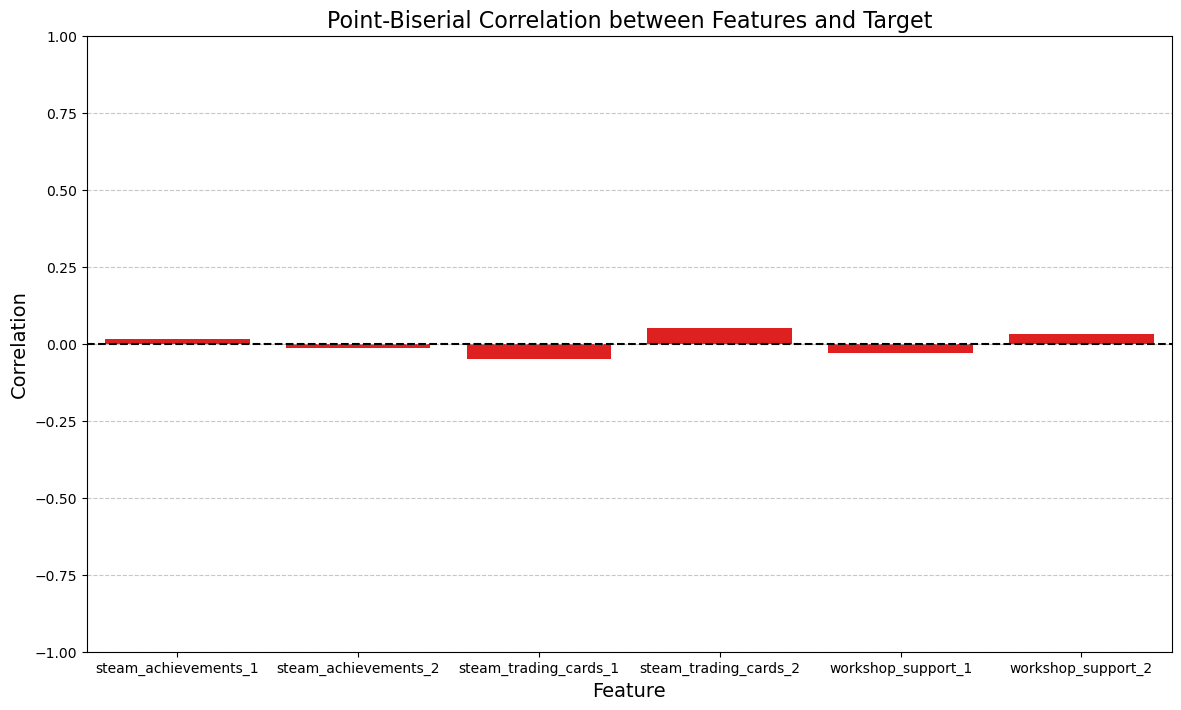

In [55]:
cols = ["steam_achievements_1", "steam_achievements_2", "steam_trading_cards_1", "steam_trading_cards_2",
        "workshop_support_1", "workshop_support_2"]

correlations = []

for col in cols:
    corr, p = pointbiserialr(x_train[col], y_train)
    correlations.append(corr)

correlation_df = pd.DataFrame({
    'Feature': cols,
    'Correlation': correlations
})

print(correlation_df)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=correlation_df,
    x='Feature',
    y='Correlation',
    color='red'
)
plt.axhline(0, color='black', linestyle='--')
plt.title('Point-Biserial Correlation between Features and Target', fontsize=16)
plt.ylabel('Correlation', fontsize=14)
plt.xlabel('Feature', fontsize=14)
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

categorical (Anova)

                  Feature      F-Score       p-value
32       publisherClass_3  1619.537044  0.000000e+00
33       publisherClass_4   238.637911  1.008933e-53
0               age_years   194.839553  3.318739e-44
30       publisherClass_1   144.958514  2.413698e-33
10           Free To Play    87.453410  8.938379e-21
14  Massively Multiplayer    64.046571  1.238508e-15
13                  Indie    54.458893  1.609482e-13
2                  Action    35.728745  2.281745e-09
6                  Casual    32.656833  1.105142e-08
27                  linux    12.990658  3.133231e-04
28                    mac     4.298882  3.814204e-02
31       publisherClass_2     3.727435  5.353062e-02
8            Early Access     3.681239  5.503307e-02
16                    RPG     1.573659  2.096818e-01
21                 Sports     0.542920  4.612281e-01
25                Violent     0.382708  5.361598e-01
22               Strategy     0.331602  5.647195e-01
12                   Gore     0.231858  6.3015

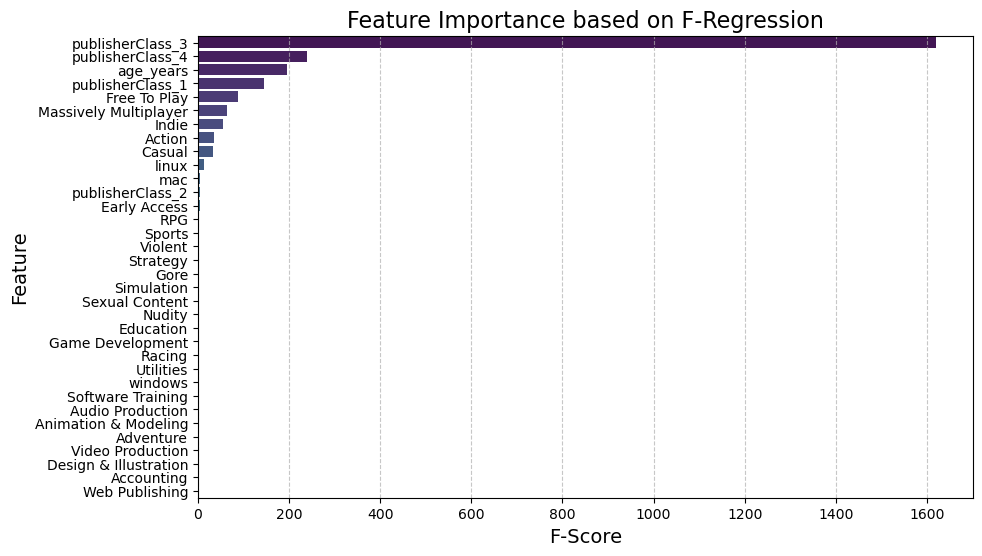

In [56]:
li=["price","reviewScore","1-GameRating","2-GameRatingWithGenres","3-RatingOverPrice",
"4-GameRatingWithPlatforms","5-NameAsCopiesSold","6-GameRatingWithNames",
"steam_achievements_1", "steam_achievements_2", "steam_trading_cards_1", "steam_trading_cards_2",
        "workshop_support_1", "workshop_support_2"]

te=x_train.drop(columns=li,axis=1)
f_scores, p_values = f_regression(te, y_train)

correlation_df = pd.DataFrame({
    'Feature': te.columns,
    'F-Score': f_scores,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

correlation_df = correlation_df.sort_values(by='F-Score', ascending=False)

print(correlation_df)
    
plt.figure(figsize=(10, 6))
sns.barplot(
    data=correlation_df,
    y='Feature',
    x='F-Score',
    palette='viridis'
)
plt.title('Feature Importance based on F-Regression', fontsize=16)
plt.xlabel('F-Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [57]:
drop=[]
for idx, row in correlation_df.iterrows():
    if row["F-Score"] < 10:
        drop.append(row["Feature"])

x_train.drop(columns=drop,inplace=True)
x_test.drop(columns=drop,inplace=True)

numerical correlation

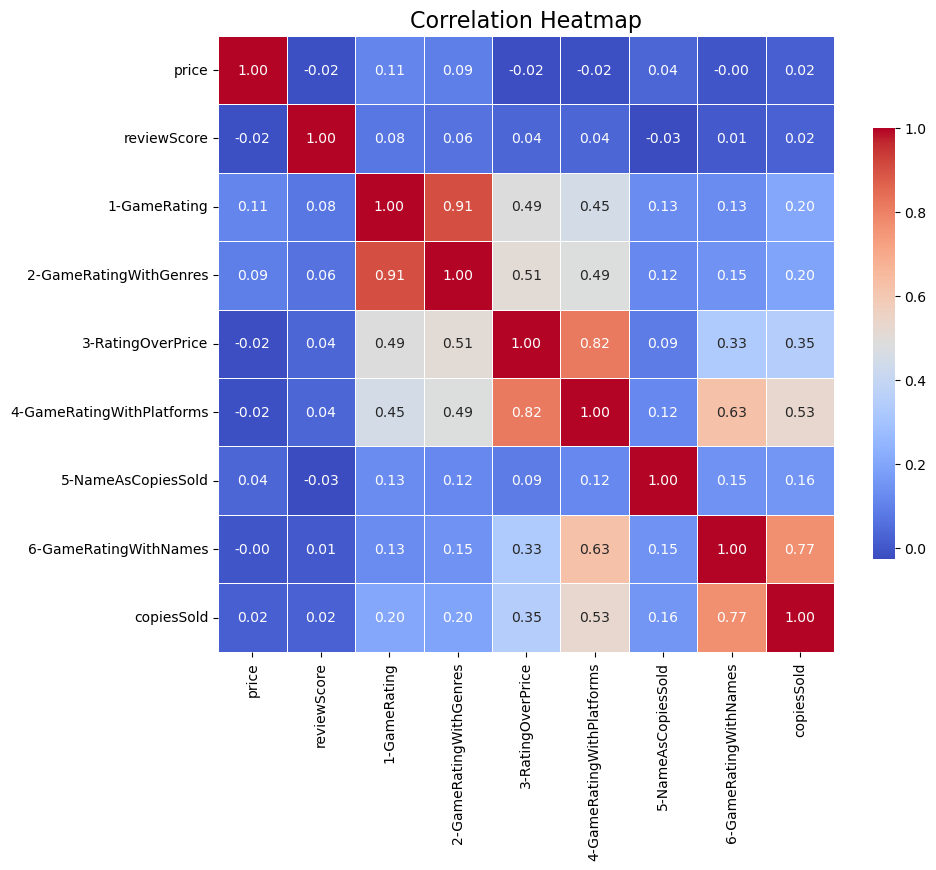

In [58]:
li=["price","reviewScore","1-GameRating","2-GameRatingWithGenres","3-RatingOverPrice",
"4-GameRatingWithPlatforms","5-NameAsCopiesSold","6-GameRatingWithNames","copiesSold"]

train_data = pd.concat([x_train, y_train], axis=1)
cor = train_data[li].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    cor,
    annot=True,     
    fmt=".2f",       
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [59]:
li=[]

for idx, feature in cor['copiesSold'].items():
    if feature < 0.08:
        li.append(idx)

x_train.drop(li,inplace=True, axis=1)
x_test.drop(li, inplace=True, axis=1)

In [60]:
x_train.shape

(55433, 22)

In [61]:
x_train.head()

,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Action,Casual,Free To Play,Indie,Massively Multiplayer,linux,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_3,publisherClass_4
54352,6,-0.029322,-0.034247,-0.135608,-0.137499,-0.226444,-0.069435,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
152,4,1.250330,1.537357,6.820913,19.989171,-0.256071,0.258718,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
45187,7,1.194906,1.606990,1.179427,0.882964,-0.186469,0.181665,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0
38784,4,-0.003035,0.006822,0.047160,0.004328,-0.261007,-0.069477,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0
57856,5,1.252969,1.826629,0.392841,0.272575,0.879991,1.476187,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0


# Model Training

# Applying PCA

In [62]:
# pca = PCA(n_components=20)  

# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# Measure Training , Test Time 

In [63]:
import time
training_times = {}
test_times = {}

# Linear regresion

In [64]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

y_pred = lr1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

start = time.time()
lr2 = LinearRegression()
lr2.fit(x_train, y_train_log)
end = time.time()
training_times['linear_regression'] = end - start

start = time.time()
y_pred_log = lr2.predict(x_test)
end = time.time()
test_times['linear_regression'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 1142290289164.9143
Root Mean Squared Error (RMSE): 1068779.81
Mean Absolute Error: 159017.13733155568
R^2 Score: 0.7581800989527399

Log1p-transformed y:
Mean Squared Error: 3000636392011.958
Root Mean Squared Error (RMSE): 1732234.51
Mean Absolute Error: 87205.87364182323
R^2 Score: 0.36477303337174616


# Plotting the results

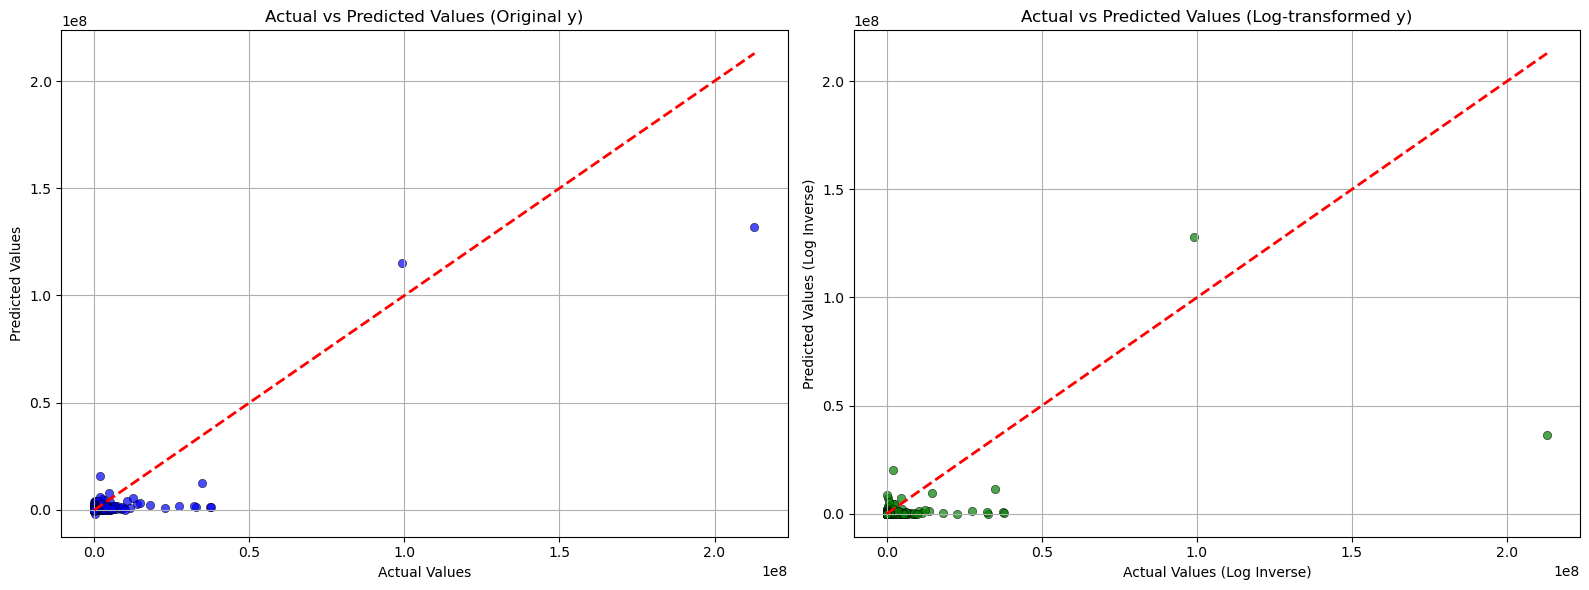

In [65]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Original y)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, color='green', edgecolor='k', alpha=0.7)

plt.plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values (Log Inverse)')
plt.ylabel('Predicted Values (Log Inverse)')
plt.title('Actual vs Predicted Values (Log-transformed y)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Ridge Regression

In [66]:
model1R = Ridge(
    alpha=1,
    fit_intercept=True,
    solver='auto',
    random_state=42
)

model1R.fit(x_train, y_train)

y_pred = model1R.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

start = time.time()
model2R = Ridge(
    alpha=1,
    fit_intercept=True,
    solver='auto',
    random_state=42
)

model2R.fit(x_train, y_train_log)
end = time.time()
training_times['ridge'] = end - start

start = time.time()
y_pred_log = model2R.predict(x_test)
end = time.time()
test_times['ridge'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 1142269779864.631
Root Mean Squared Error (RMSE): 1068770.22
Mean Absolute Error: 158995.67698774658
R^2 Score: 0.758184440718587

Log1p-transformed y:
Mean Squared Error: 3002072340846.6807
Root Mean Squared Error (RMSE): 1732648.94
Mean Absolute Error: 87070.3713897329
R^2 Score: 0.3644690467158014


# Plotting The results

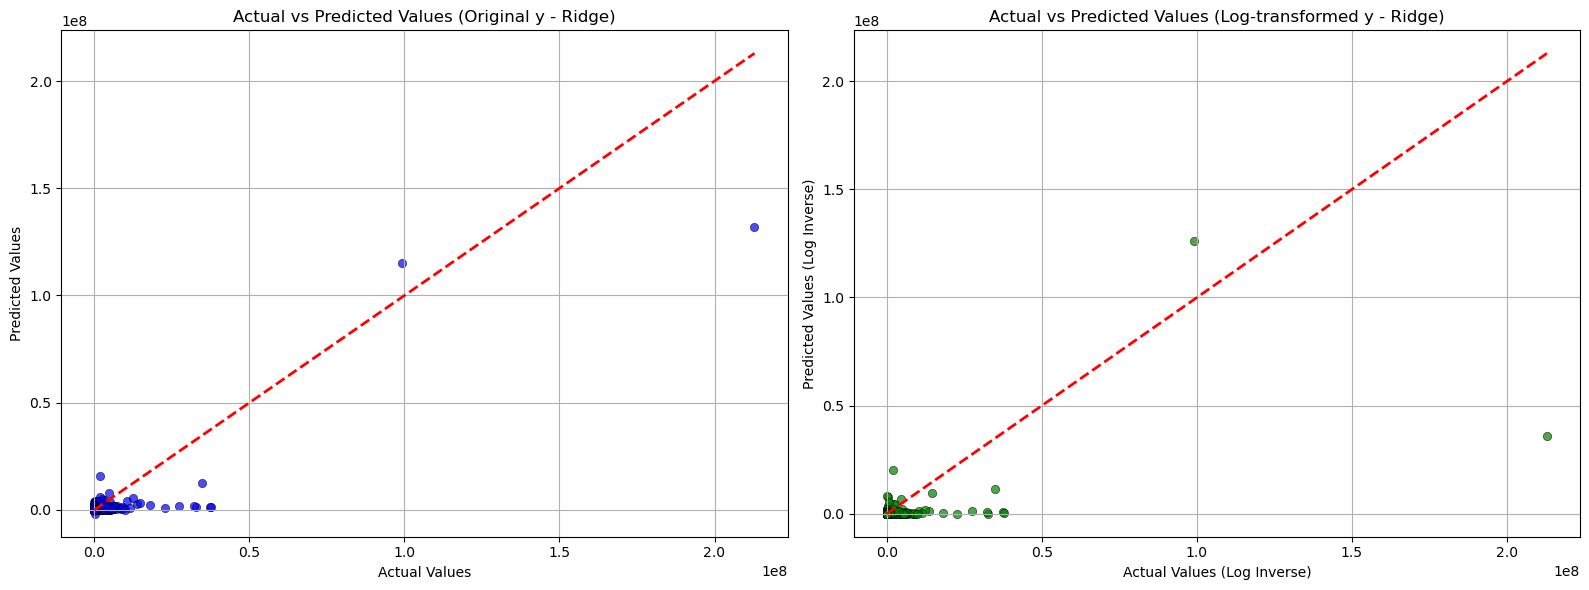

In [67]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Original y - Ridge)')
plt.grid(True)

plt.subplot(1, 2, 2) 
sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, color='green', edgecolor='k', alpha=0.7)

plt.plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values (Log Inverse)')
plt.ylabel('Predicted Values (Log Inverse)')
plt.title('Actual vs Predicted Values (Log-transformed y - Ridge)')
plt.grid(True)

plt.tight_layout() 
plt.show()


# Lasso Regression

In [68]:
model1L = Lasso(
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=0.0001,
    random_state=42
)
model1L.fit(x_train, y_train)

y_pred = model1L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

start = time.time()
model2L = Lasso(
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=0.0001,
    random_state=42
)

model2L.fit(x_train, y_train_log)
end = time.time()
training_times['lasso'] = end - start

start = time.time()
y_pred_log = model2L.predict(x_test)
end = time.time()
test_times['lasso'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 1142290289072.962
Root Mean Squared Error (RMSE): 1068779.81
Mean Absolute Error: 159017.13680746206
R^2 Score: 0.758180098972206

Log1p-transformed y:
Mean Squared Error: 2999748315726.7886
Root Mean Squared Error (RMSE): 1731978.15
Mean Absolute Error: 86937.43918256828
R^2 Score: 0.3649610368253684


# Plotting The results

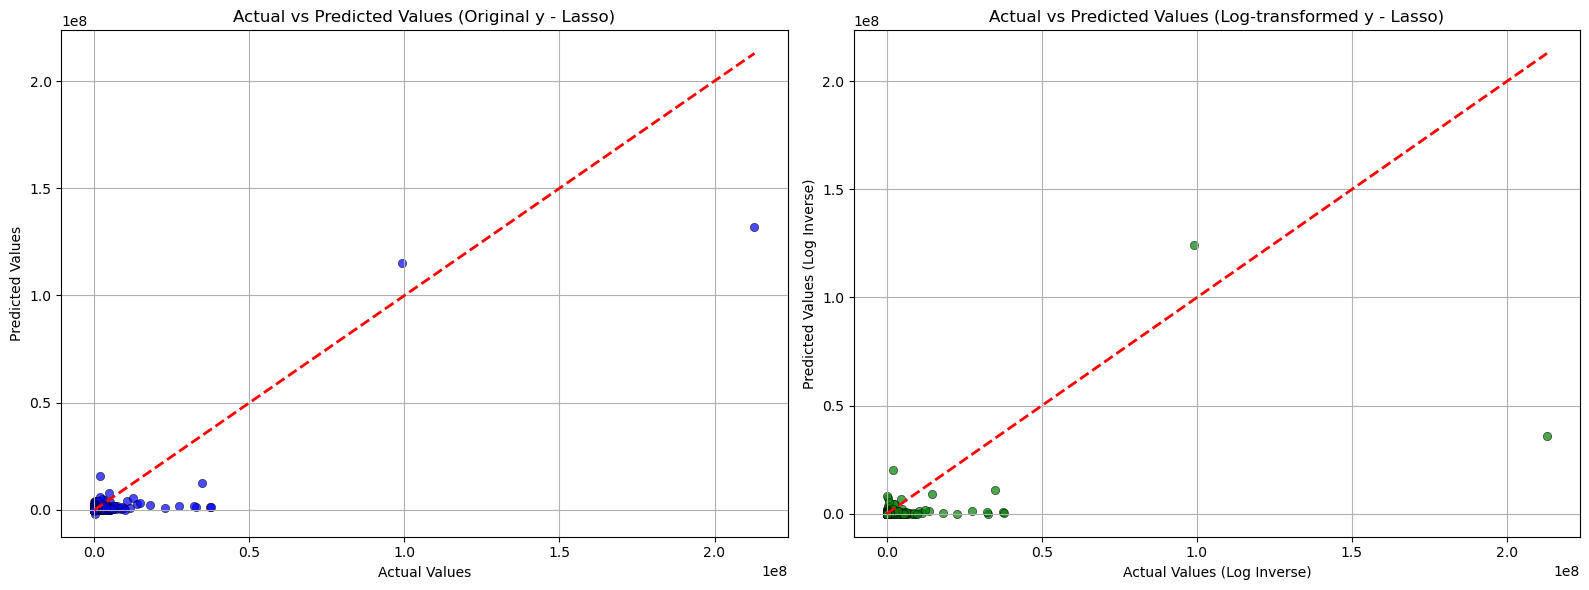

In [69]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Original y - Lasso)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, color='green', edgecolor='k', alpha=0.7)

plt.plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values (Log Inverse)')
plt.ylabel('Predicted Values (Log Inverse)')
plt.title('Actual vs Predicted Values (Log-transformed y - Lasso)')
plt.grid(True)

plt.tight_layout()
plt.show()

# RandomForest & GridSearch

In [70]:
# rf = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'max_depth': [None, 10, 20, 30],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4],    
#     'max_features': ['auto', 'sqrt', 'log2']  
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',  
#     n_jobs=-1, 
#     verbose=1
# )

# grid_search.fit(x_train, y_train)
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(x_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
# print("\nTest Set Evaluation using Best Model from GridSearchCV:")
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters from GridSearchCV: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Test Set Evaluation using Best Model from GridSearchCV:
Mean Squared Error: 2.0504432758918125
R^2 Score: 0.7914442767029305

----------------------------------------------------------------------------------------------------------------------

# RandomForest w/ best parameters from GridSearch

In [71]:
rf1 = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200
)
rf1.fit(x_train, y_train)

y_pred = rf1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

start = time.time()
rf_log = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200
)

rf_log.fit(x_train, y_train_log)
end = time.time()
training_times['random_forest'] = end - start

start = time.time()
y_pred_log = rf_log.predict(x_test)
end = time.time()
test_times['random_forest'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 2234319181026.7036
Root Mean Squared Error (RMSE): 1494763.92
Mean Absolute Error: 105127.0669822634
R^2 Score: 0.5270004057735027

Log1p-transformed y:
Mean Squared Error: 4039961914739.4893
Root Mean Squared Error (RMSE): 2009965.65
Mean Absolute Error: 86460.11952545277
R^2 Score: 0.14475050718394045


# Plotting The results

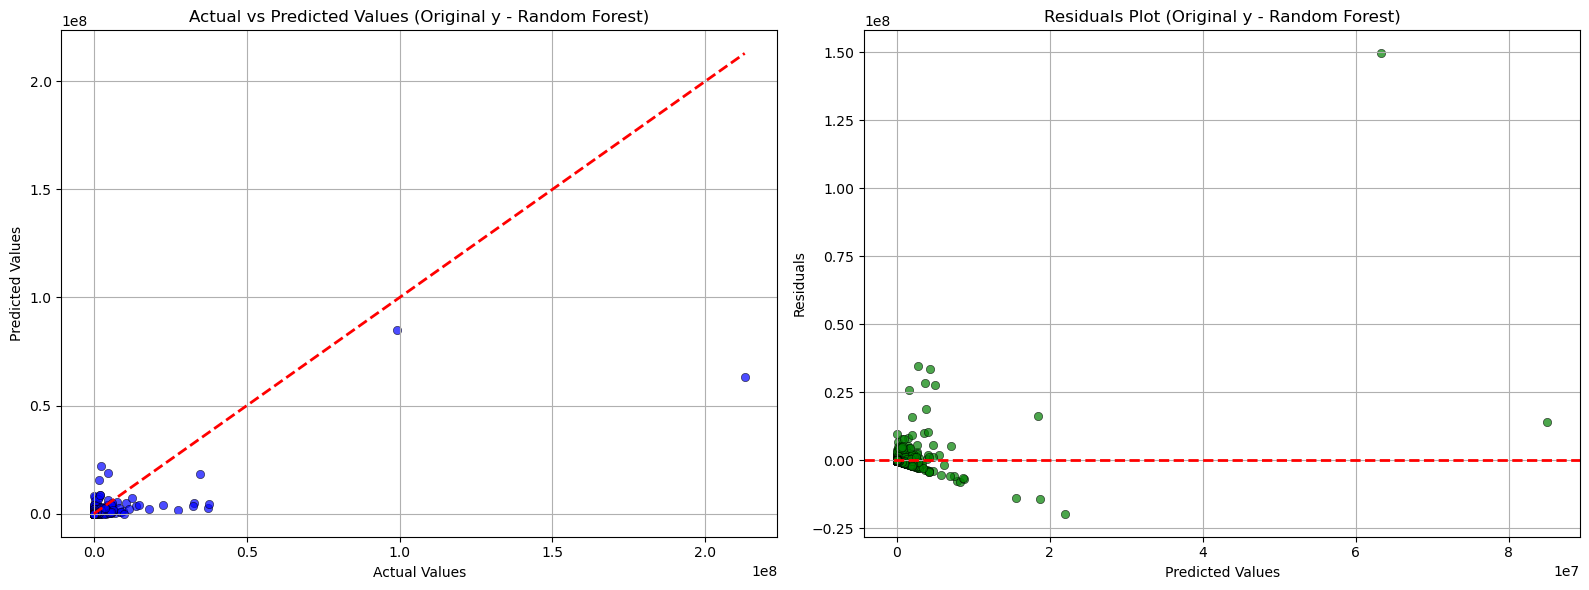

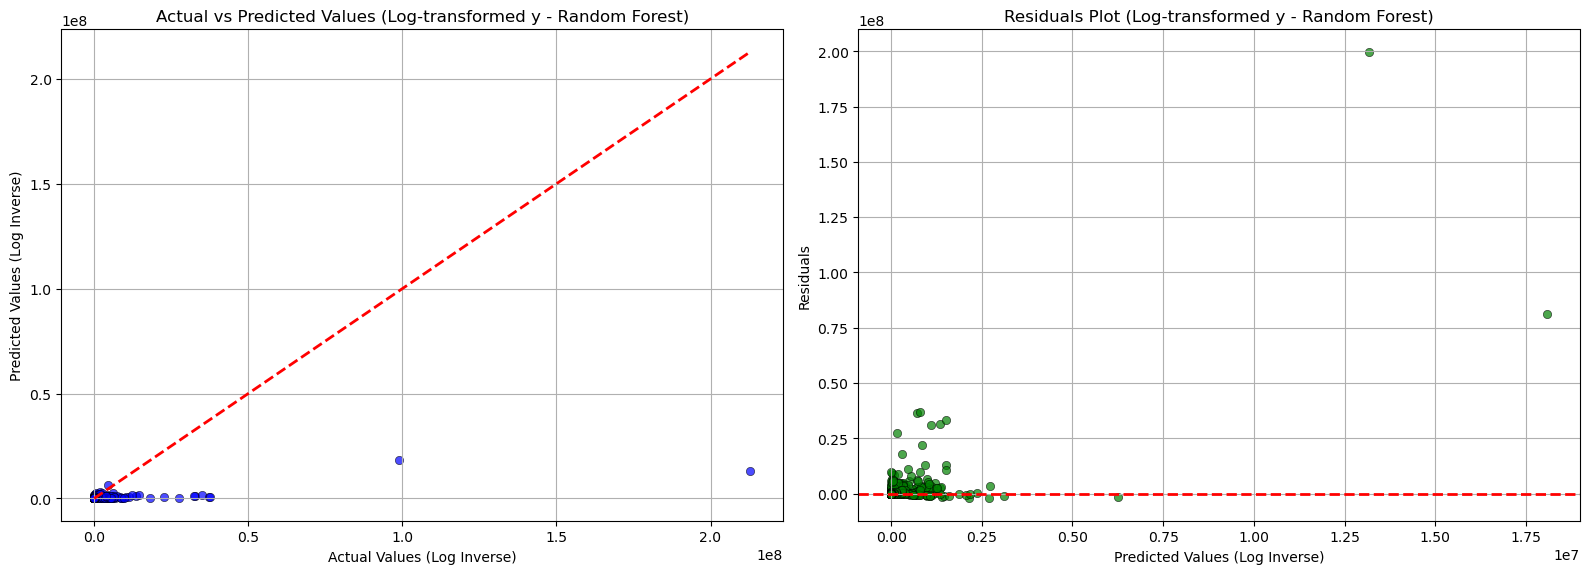

In [72]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Original y - Random Forest)')
plt.grid(True)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='green', edgecolor='k', alpha=0.7)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Original y - Random Forest)')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, color='blue', edgecolor='k', alpha=0.7)

plt.plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values (Log Inverse)')
plt.ylabel('Predicted Values (Log Inverse)')
plt.title('Actual vs Predicted Values (Log-transformed y - Random Forest)')
plt.grid(True)

plt.subplot(1, 2, 2)
residuals_log = y_true_inverse - y_pred_inverse
sns.scatterplot(x=y_pred_inverse, y=residuals_log, color='green', edgecolor='k', alpha=0.7)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Log Inverse)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Log-transformed y - Random Forest)')
plt.grid(True)

plt.tight_layout()
plt.show()

# SVM & PCA

In [73]:
pca = PCA(n_components=None)  

x_trainP = pca.fit_transform(x_train)
x_testP = pca.transform(x_test)

svm1 = SVR(kernel='rbf', C=10.0, epsilon=0.01)

svm1.fit(x_trainP, y_train)
y_pred = svm1.predict(x_testP)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

start = time.time()
svm_log = SVR(kernel='rbf', C=10.0, epsilon=0.01)
svm_log.fit(x_trainP, y_train_log)
end = time.time()
training_times['svm'] = end - start

start = time.time()
y_pred_log = svm_log.predict(x_testP)
end = time.time()
test_times['svm'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 4732759064228.312
Root Mean Squared Error (RMSE): 2175490.53
Mean Absolute Error: 96099.83199651843
R^2 Score: -0.0019128582708138886

Log1p-transformed y:
Mean Squared Error: 7.018296155502743e+37
Root Mean Squared Error (RMSE): 8377527174233900032.00
Mean Absolute Error: 7.116229094749293e+16
R^2 Score: -1.4857551516828287e+25


Original y:
Mean Squared Error: 4732759064228.312
Root Mean Squared Error (RMSE): 2175490.53
Mean Absolute Error: 96099.83199651843
R^2 Score: -0.0019128582708138886

Log1p-transformed y:
Mean Squared Error: 7.018296155502743e+37
Root Mean Squared Error (RMSE): 8377527174233900032.00
Mean Absolute Error: 7.116229094749293e+16
R^2 Score: -1.4857551516828287e+25

# Plotting The results

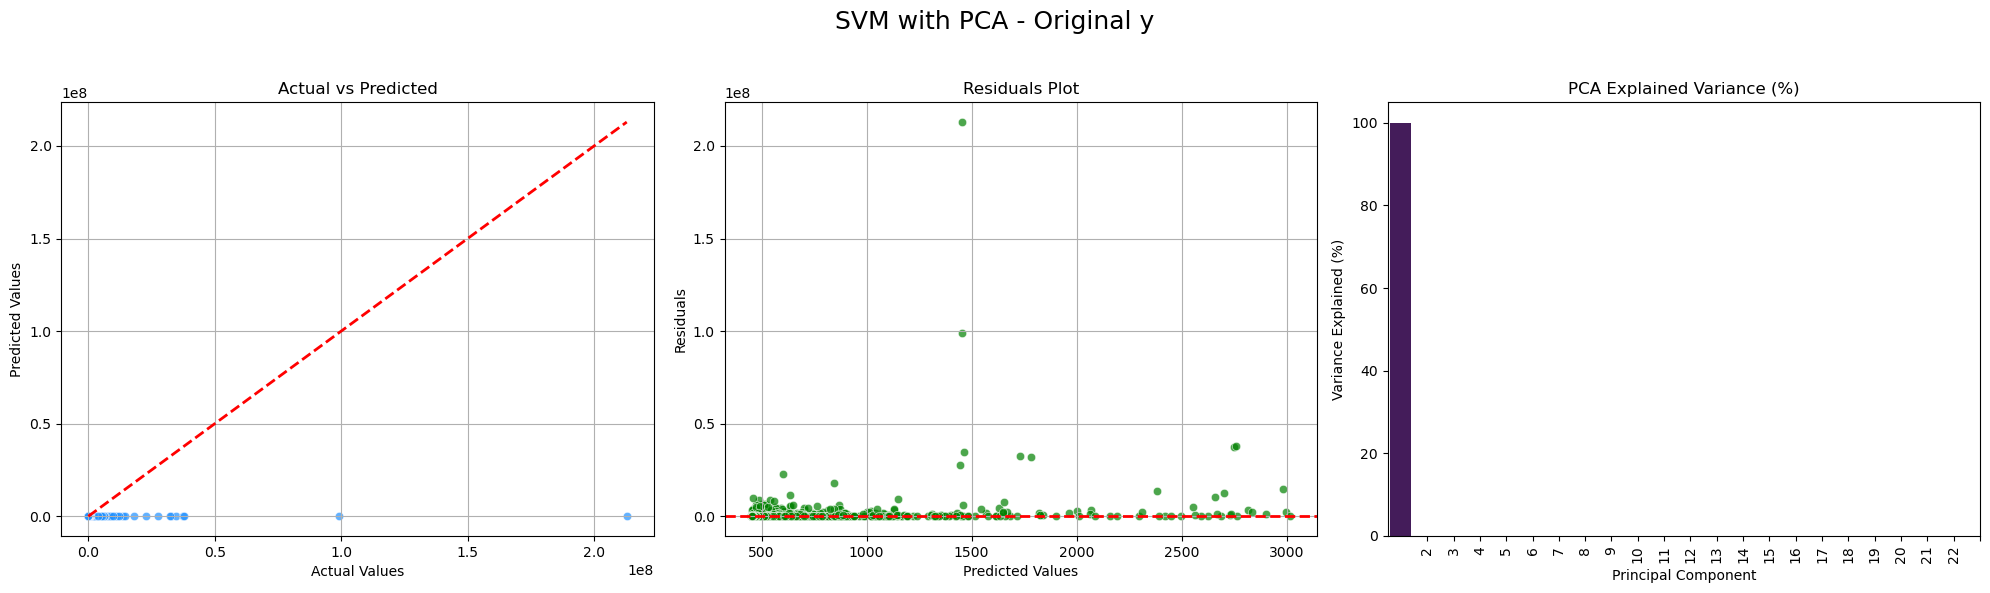

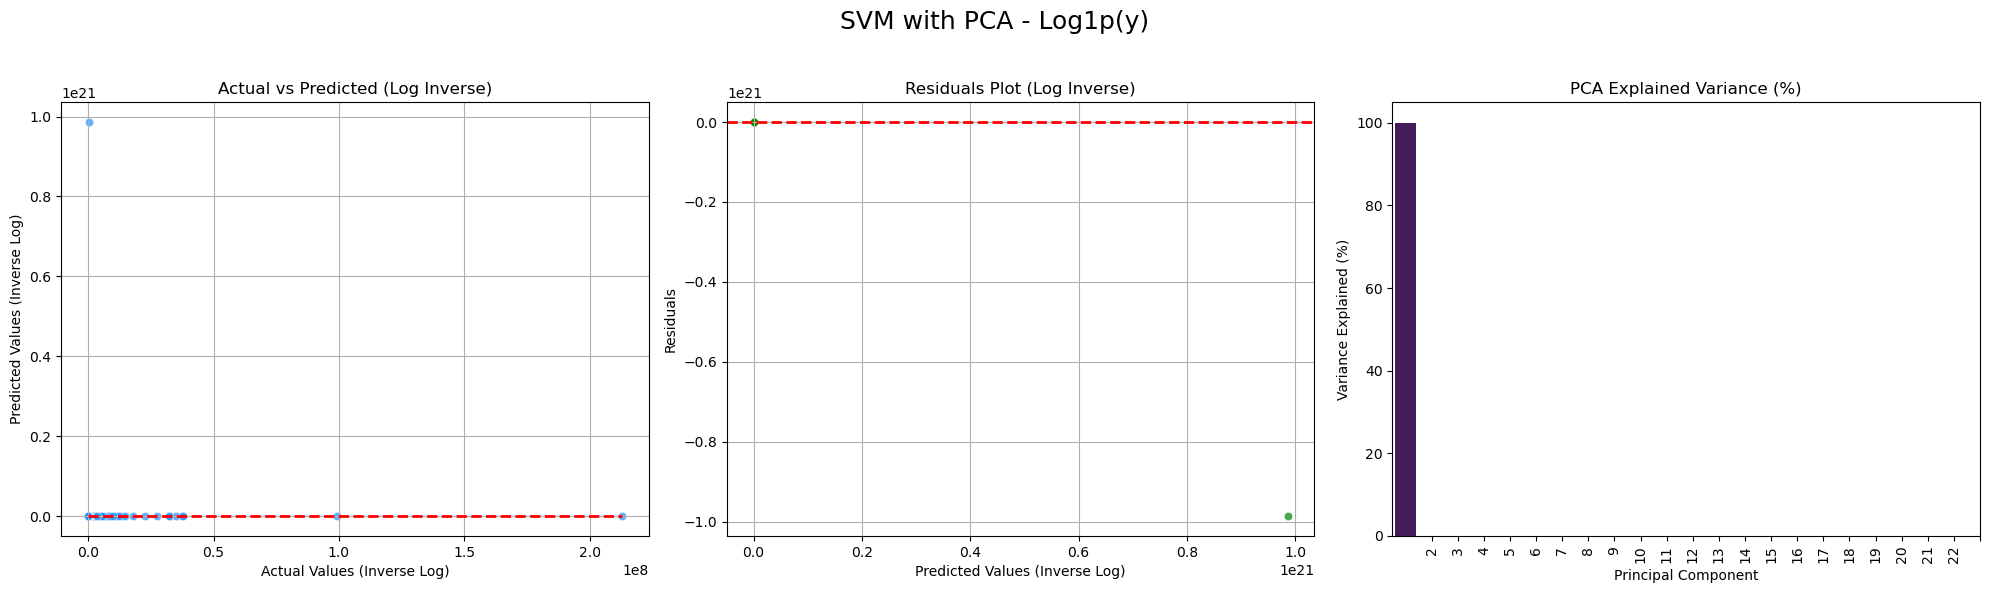

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('SVM with PCA - Original y', fontsize=18)

sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True)

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].grid(True)

explained_variance_ratio = pca.explained_variance_ratio_ * 100
components = np.arange(1, len(explained_variance_ratio) + 1)
sns.barplot(x=components, y=explained_variance_ratio, ax=axes[2], palette="viridis")
axes[2].set_title('PCA Explained Variance (%)')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Variance Explained (%)')
axes[2].set_xticks(components)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('SVM with PCA - Log1p(y)', fontsize=18)

sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values (Inverse Log)')
axes[0].set_ylabel('Predicted Values (Inverse Log)')
axes[0].set_title('Actual vs Predicted (Log Inverse)')
axes[0].grid(True)

residuals_log = y_true_inverse - y_pred_inverse
sns.scatterplot(x=y_pred_inverse, y=residuals_log, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values (Inverse Log)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot (Log Inverse)')
axes[1].grid(True)

sns.barplot(x=components, y=explained_variance_ratio, ax=axes[2], palette="viridis")
axes[2].set_title('PCA Explained Variance (%)')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Variance Explained (%)')
axes[2].set_xticks(components)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# XGBOOST & GridSearch

In [75]:
# xgb = XGBRegressor(
#     objective='reg:squarederror',
#     random_state=42,
#     n_jobs=-1
# )

# param_grid = {
#     'n_estimators': [100, 200, 300],             
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],     
#     'max_depth': [3, 5, 7, 9],                  
#     'subsample': [0.6, 0.8, 1.0],                 
#     'colsample_bytree': [0.6, 0.8, 1.0]          
# }

# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 1.8937102424468064
R^2 Score: 0.8073859862537348

# XGBOOST w/ Best Parameters from Grid Search

In [76]:
model1 = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=9,
    subsample=1,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

model_log = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=9,
    subsample=1,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

start = time.time()
model_log.fit(x_train, y_train_log)
end = time.time()
training_times['xgb'] = end - start

start = time.time()
y_pred_log = model_log.predict(x_test)
end = time.time()
test_times['xgb'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 4123437150789.5356
Root Mean Squared Error (RMSE): 2030624.82
Mean Absolute Error: 114000.37268479804
R^2 Score: 0.12707901552110235

Log1p-transformed y:
Mean Squared Error: 1714066399321.3386
Root Mean Squared Error (RMSE): 1309223.59
Mean Absolute Error: 77937.25589451425
R^2 Score: 0.6371365746483395


# Plotting The results

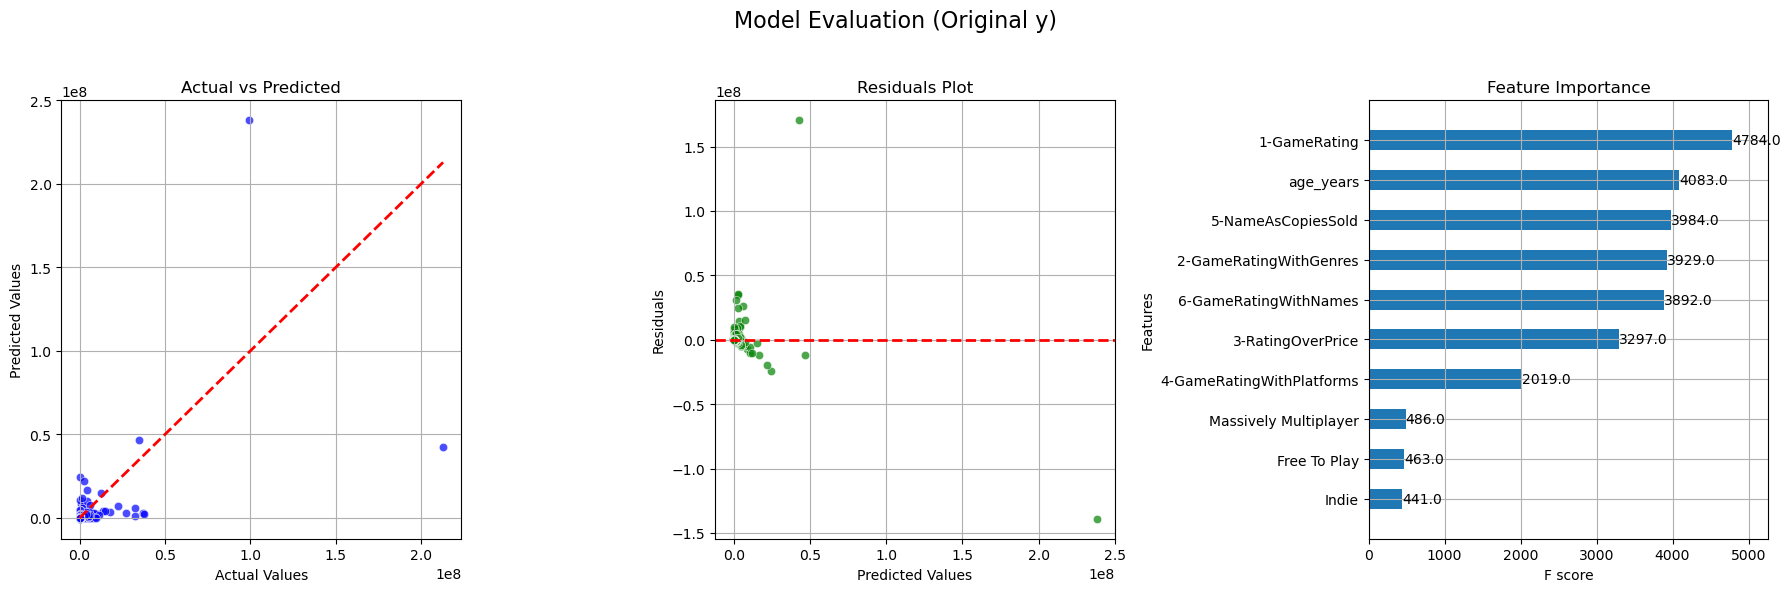

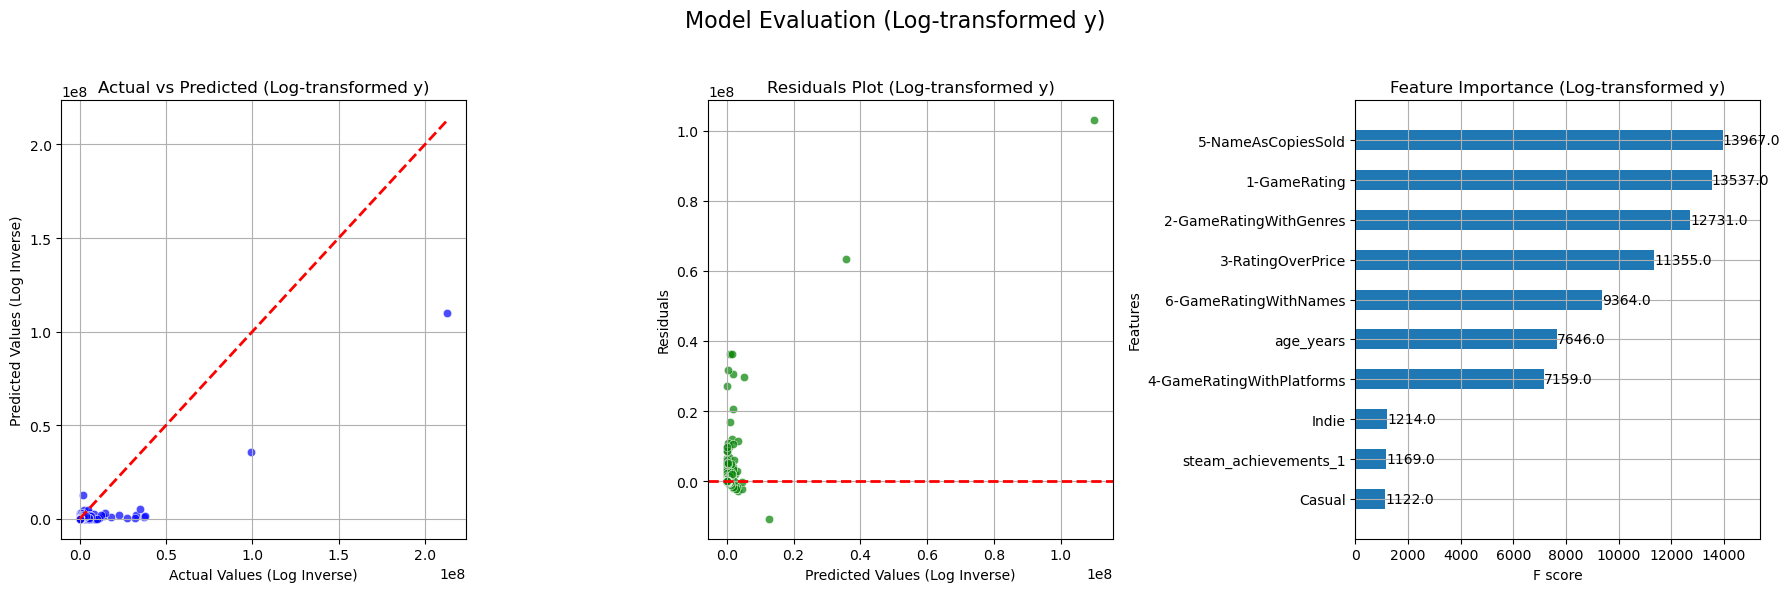

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Evaluation (Original y)', fontsize=16)

sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='w', alpha=0.7, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True)

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='green', edgecolor='w', alpha=0.7, ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].grid(True)

xgb.plot_importance(model1, importance_type='weight', max_num_features=10, height=0.5, ax=axes[2])
axes[2].set_title('Feature Importance')

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Evaluation (Log-transformed y)', fontsize=16)

sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, color='blue', edgecolor='w', alpha=0.7, ax=axes[0])
axes[0].plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Actual Values (Log Inverse)')
axes[0].set_ylabel('Predicted Values (Log Inverse)')
axes[0].set_title('Actual vs Predicted (Log-transformed y)')
axes[0].grid(True)

residuals_log = y_true_inverse - y_pred_inverse
sns.scatterplot(x=y_pred_inverse, y=residuals_log, color='green', edgecolor='w', alpha=0.7, ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values (Log Inverse)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot (Log-transformed y)')
axes[1].grid(True)

xgb.plot_importance(model_log, importance_type='weight', max_num_features=10, height=0.5, ax=axes[2])
axes[2].set_title('Feature Importance (Log-transformed y)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# LGB &  Grid Search

In [78]:
# model = lgb.LGBMRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'num_leaves': [31, 50],
#     'max_depth': [-1, 10]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best LightGBM Params:", grid_search.best_params_)
# print(f"Test MSE: {mse:.4f}")
# print(f"Test R² Score: {r2:.4f}")

# LGB w/ Best Parameters from Grid Search

In [79]:
model1L = lgb.LGBMRegressor(
    n_estimators=270,
    learning_rate=0.06,
    num_leaves=50,
    max_depth=10,
    random_state=42,
    min_child_samples=20,
)

model1L.fit(x_train, y_train)

y_pred = model1L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

model2L = lgb.LGBMRegressor(
    n_estimators=270,
    learning_rate=0.06,
    num_leaves=50,
    max_depth=10,
    random_state=42,
    min_child_samples=20,
    verbosity=-1
)

start = time.time()
model2L.fit(x_train, y_train_log)
end = time.time()
training_times['lgb'] = end - start

start = time.time()
y_pred_log = model2L.predict(x_test)
end = time.time()
test_times['lgb'] = end - start

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 55433, number of used features: 22
[LightGBM] [Info] Start training from score 83410.915051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

# Plotting The results

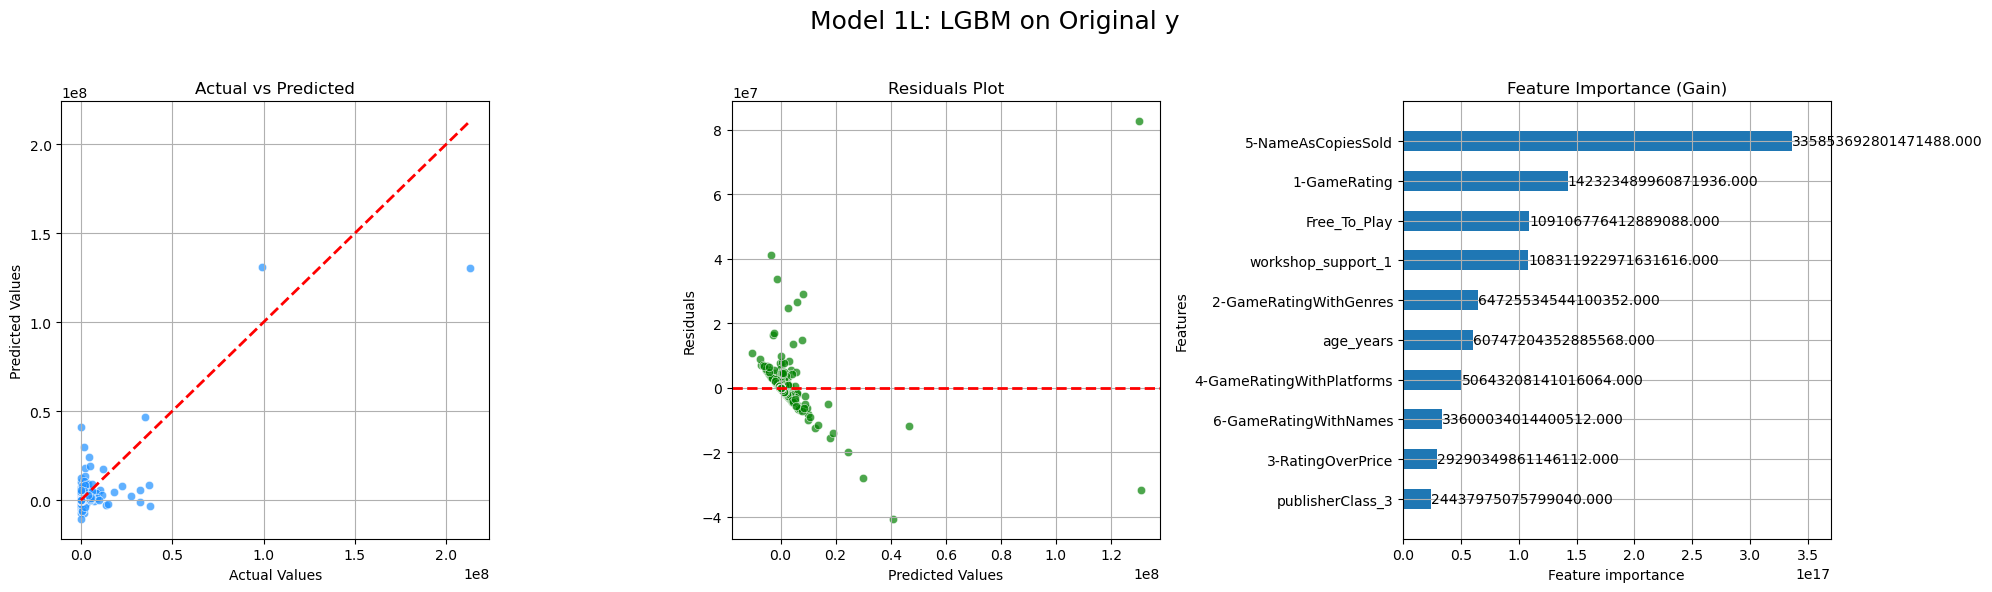

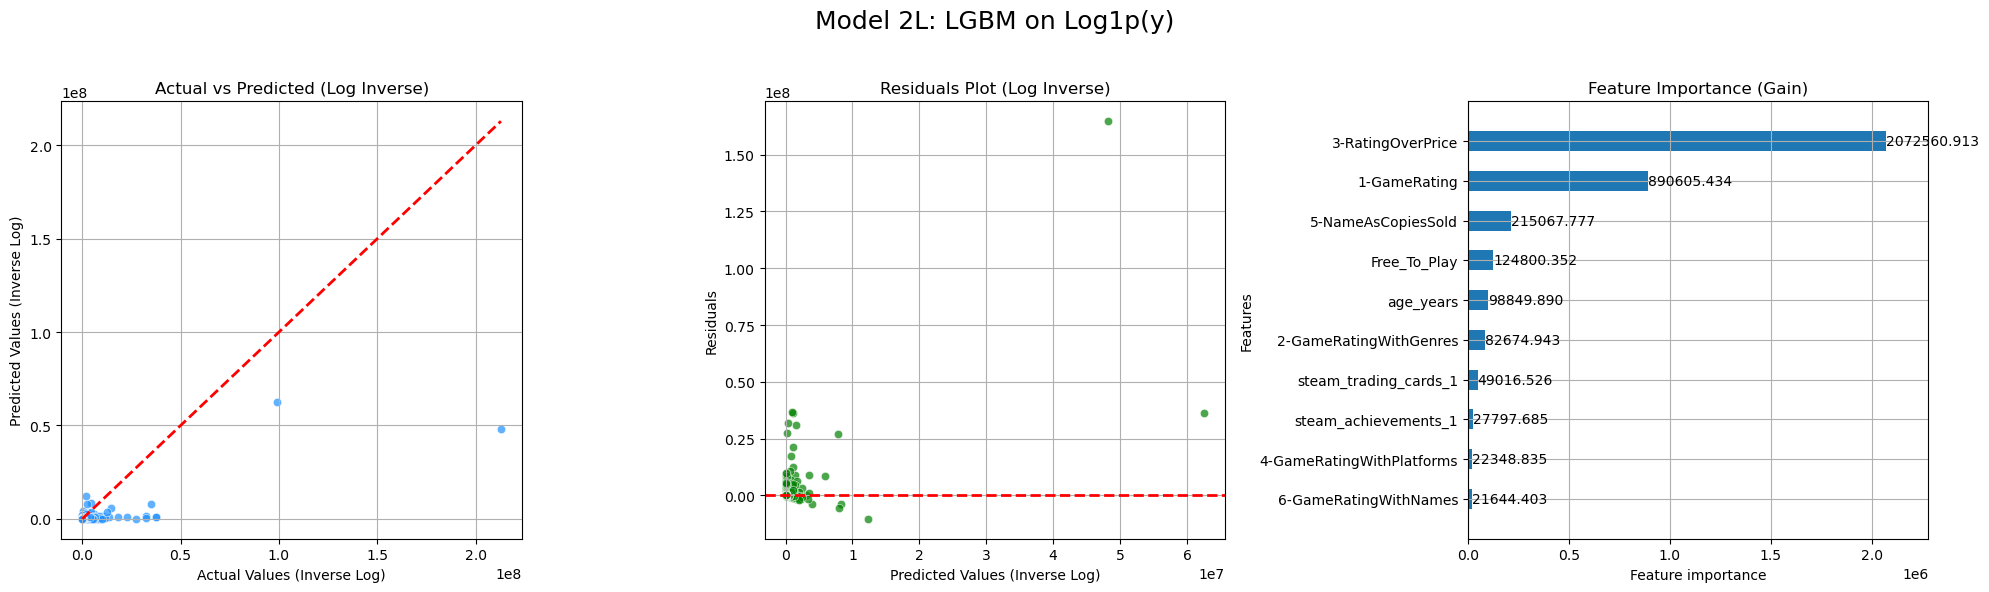

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model 1L: LGBM on Original y', fontsize=18)

sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True)

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].grid(True)

lgb.plot_importance(model1L, importance_type='gain', max_num_features=10, height=0.5, ax=axes[2])
axes[2].set_title('Feature Importance (Gain)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model 2L: LGBM on Log1p(y)', fontsize=18)

sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values (Inverse Log)')
axes[0].set_ylabel('Predicted Values (Inverse Log)')
axes[0].set_title('Actual vs Predicted (Log Inverse)')
axes[0].grid(True)

residuals_log = y_true_inverse - y_pred_inverse
sns.scatterplot(x=y_pred_inverse, y=residuals_log, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values (Inverse Log)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot (Log Inverse)')
axes[1].grid(True)

lgb.plot_importance(model2L, importance_type='gain', max_num_features=10, height=0.5, ax=axes[2])
axes[2].set_title('Feature Importance (Gain)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# CatBoost & Grid Search

In [81]:
# model = CatBoostRegressor(verbose=0, random_state=42)

# param_grid = {
#     'iterations': [200, 300],
#     'learning_rate': [0.03, 0.1],
#     'depth': [6, 10]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best CatBoost Params:", grid_search.best_params_)
# print(f"Test MSE: {mse:.4f}")
# print(f"Test R² Score: {r2:.4f}")

# CatBoost w/ Best Parameters from Grid Search

In [82]:
model1C = CatBoostRegressor(
    iterations=280,
    learning_rate=0.06,
    depth=11,
    verbose=0,
    random_state=42
)

start = time.time()
model1C.fit(x_train, y_train)
end = time.time()
training_times['cat'] = end - start

start = time.time()
y_pred = model1C.predict(x_test)
end = time.time()
test_times['cat'] = end - start

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Original y:")
print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

model2C = CatBoostRegressor(
    iterations=280,
    learning_rate=0.06,
    depth=11,
    verbose=0,
    random_state=42
)
model2C.fit(x_train, y_train_log)

y_pred_log = model2C.predict(x_test)

y_pred_inverse = np.expm1(y_pred_log)
y_true_inverse = np.expm1(y_test_log)

mse_log = mean_squared_error(y_true_inverse, y_pred_inverse)
r2_log = r2_score(y_true_inverse, y_pred_inverse)
rmse = np.sqrt(mse_log)
mae_log= mean_absolute_error(y_true_inverse, y_pred_inverse)

print("\nLog1p-transformed y:")
print("Mean Squared Error:", mse_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Mean Absolute Error:", mae_log)
print("R^2 Score:", r2_log)

Original y:
Mean Squared Error: 1135875981662.764
Root Mean Squared Error (RMSE): 1065774.83
Mean Absolute Error: 102260.87878002506
R^2 Score: 0.759537991268003

Log1p-transformed y:
Mean Squared Error: 2118960227270.334
Root Mean Squared Error (RMSE): 1455664.87
Mean Absolute Error: 78971.278052617
R^2 Score: 0.5514215980456303


# Plotting The results

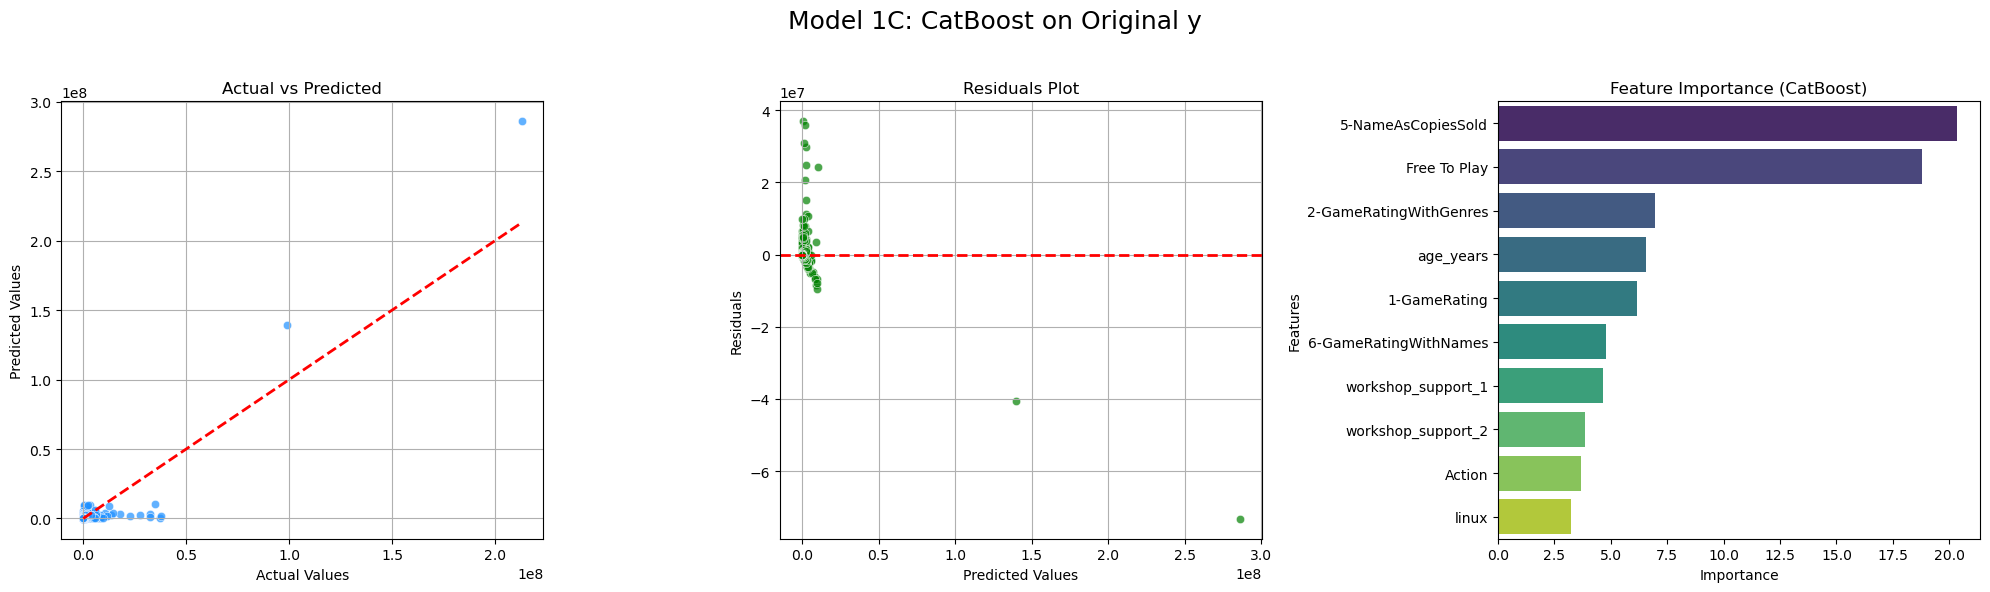

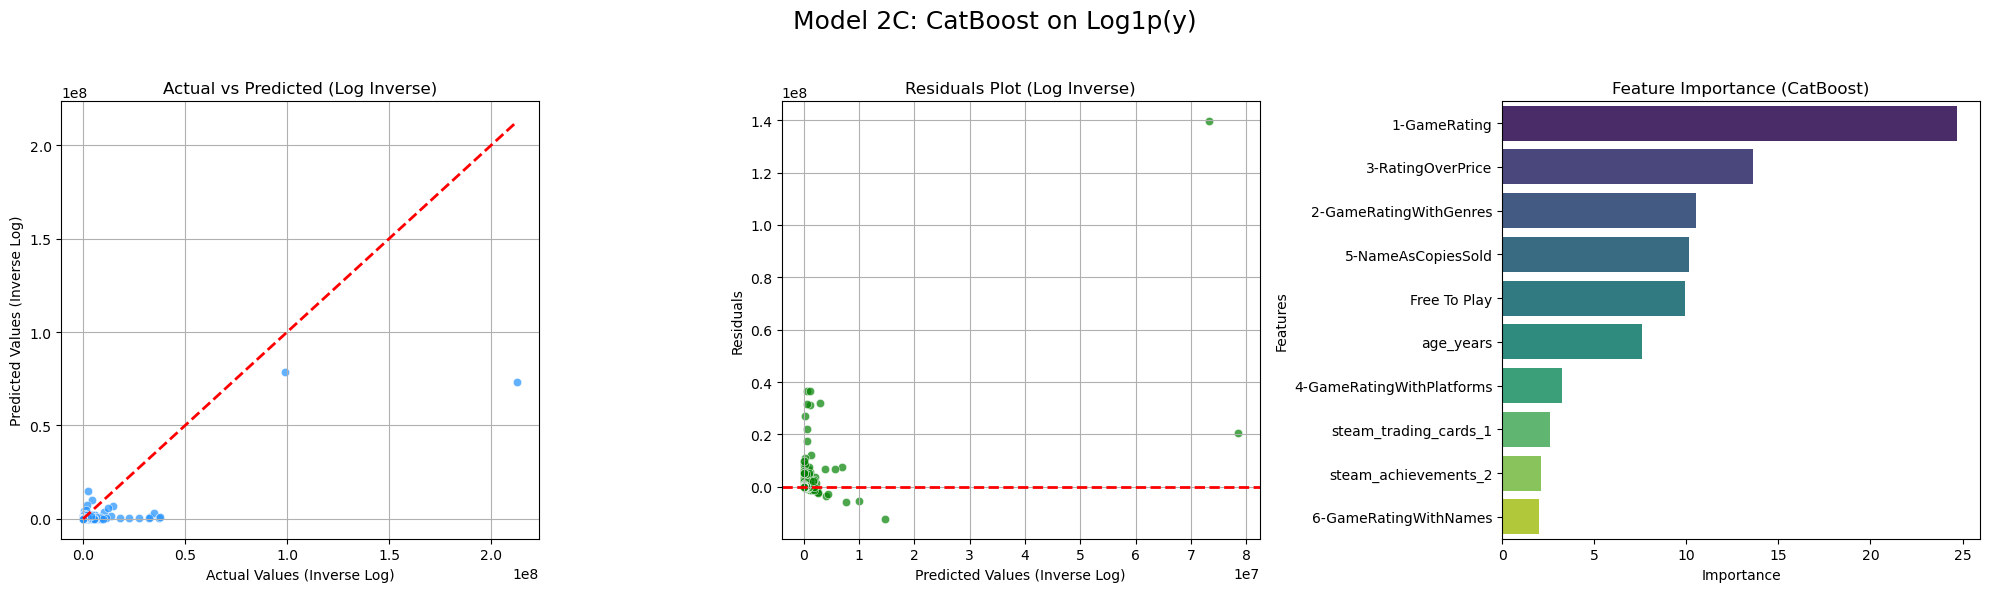

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model 1C: CatBoost on Original y', fontsize=18)

sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted')
axes[0].grid(True)

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')
axes[1].grid(True)

feature_importances = model1C.get_feature_importance()
features = x_train.columns
sorted_idx = feature_importances.argsort()[::-1][:10]

sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx], ax=axes[2], palette="viridis")
axes[2].set_title('Feature Importance (CatBoost)')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Features')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model 2C: CatBoost on Log1p(y)', fontsize=18)

sns.scatterplot(x=y_true_inverse, y=y_pred_inverse, ax=axes[0], color='dodgerblue', edgecolor='w', alpha=0.7)
axes[0].plot([y_true_inverse.min(), y_true_inverse.max()], [y_true_inverse.min(), y_true_inverse.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Values (Inverse Log)')
axes[0].set_ylabel('Predicted Values (Inverse Log)')
axes[0].set_title('Actual vs Predicted (Log Inverse)')
axes[0].grid(True)

residuals_log = y_true_inverse - y_pred_inverse
sns.scatterplot(x=y_pred_inverse, y=residuals_log, ax=axes[1], color='green', edgecolor='w', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values (Inverse Log)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot (Log Inverse)')
axes[1].grid(True)

feature_importances = model2C.get_feature_importance()
features = x_train.columns
sorted_idx = feature_importances.argsort()[::-1][:10]

sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx], ax=axes[2], palette="viridis")
axes[2].set_title('Feature Importance (CatBoost)')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Features')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot train time for all models

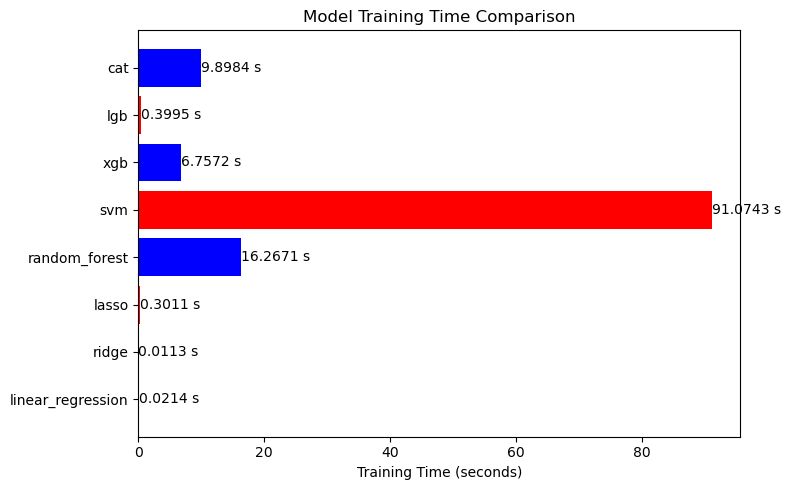

In [84]:
model_names = list(training_times.keys())
times = list(training_times.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, times, color=['red', 'blue'])
plt.xlabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f} s', va='center')

plt.tight_layout()
plt.show()

# Plot test time for all models

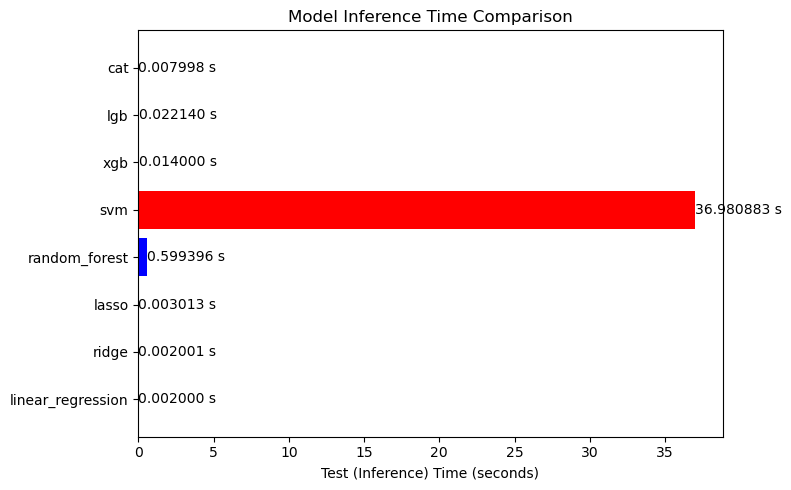

In [85]:
model_names = list(test_times.keys())
times = list(test_times.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, times, color=['red', 'blue'])
plt.xlabel('Test (Inference) Time (seconds)')
plt.title('Model Inference Time Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.6f} s', va='center')

plt.tight_layout()
plt.show()

# Bar Chart for R2-Score for all models

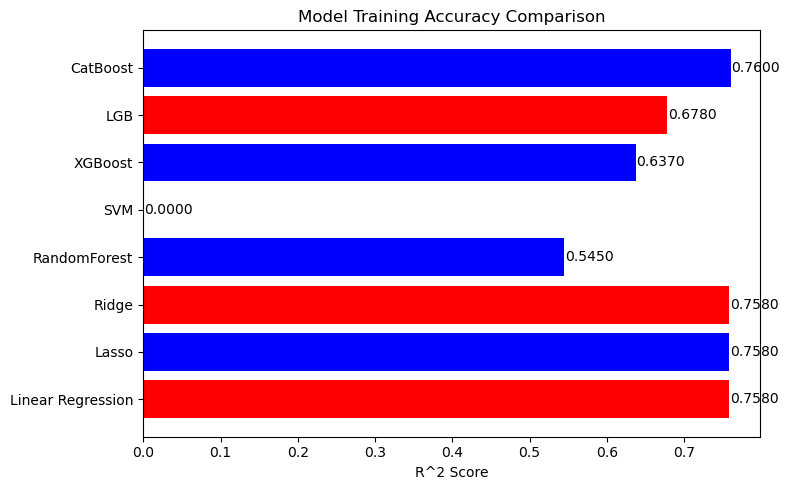

In [86]:
train_accuracies = {
    "Linear Regression":0.758,
    "Lasso":0.758,
    "Ridge":0.758, 
    "RandomForest":0.545,
    "SVM":0.0,
    "XGBoost":0.637,
    "LGB":0.678,
    "CatBoost":0.760
}
model_names = list(train_accuracies.keys())
r2_scores = list(train_accuracies.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, r2_scores, color=['red', 'blue'])
plt.xlabel('R^2 Score')
plt.title('Model Training Accuracy Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.tight_layout()
plt.show()

# Combine All Data for best model

In [87]:
modelCat = CatBoostRegressor(
    iterations=280,
    learning_rate=0.06,
    depth=11,
    verbose=0,
    random_state=42
)

x_final=pd.concat([x_train,x_test],axis=0)
y_final=pd.concat([y_train,y_test],axis=0)

modelCat.fit(x_final, y_final)

# After Comparison of Models in terms of (rmse,mae,r2-score) catboost is the best model to use in deployment with original target

In [88]:
# modelCat.save_model('model1C.cbm')

# joblib.dump(Ro_scaler, 'robust_scaler.pkl')
# joblib.dump(minmax_scaler, 'minmax_scaler.pkl')
# joblib.dump(OneHot_Encoder, 'onehot_encoder.pkl')
# joblib.dump(mlb_genres, 'mlb_genres_encoder.pkl')

# joblib.dump(dict1, 'dict1_genres.pkl')
# joblib.dump(dict2, 'dict2_platforms.pkl')
# joblib.dump(dict12, 'dict12_names.pkl')
# joblib.dump(mlb_sup, 'mlb_platforms_encoder.pkl')
# joblib.dump(Null_Dict,"Null_Dict_reg.pkl")
